#  Measurement of the zero of waveplate
***
* Eder Martioli, LNA 26 Feb 2025

This notebook presents an analysis of data collected during an engineering night with SPARC4 to measure the zero of the waveplate, based on observations of a circularly polarized standard star.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib
from uncertainties import ufloat

### Access to the reduced data :
The reduced data presented in this document as well as all reduced data from the engineering night with SPARC4 on Feb 24, 2025, are available for download at [Engineering 20250224](https://drive.google.com/drive/folders/1_bVizkJ1jjyxw4BnAAnbtSKVV1jhNZMl?usp=sharing).

# Circularly polarized standard: WD 1036-204
***
In this section we analyze the circularly polarized standard WD 1036-204

### Load file paths :

In [2]:
s2, s4 = [], []
p2, p4 = [], []

# change path below to the location where the reduced data are saved:
reducedir = "/Users/eder/Science/Transits-OPD_2024A/20250224/"

for ch in range(1,5) :
    s2_filepath = "{}/20250224_s4c{}_Gain2_1.0_Conventional_2_WD1036-204_POLAR_L2__stack.fits".format(reducedir,ch)
    s4_filepath = "{}/20250224_s4c{}_Gain2_1.0_Conventional_2_WD1036-204_POLAR_L4__stack.fits".format(reducedir,ch)
    p2_filepath = "{}/20250224_s4c{}_Gain2_1.0_Conventional_2_WD1036-204_POLAR_L2__polar.fits".format(reducedir,ch)
    p4_filepath = "{}/20250224_s4c{}_Gain2_1.0_Conventional_2_WD1036-204_POLAR_L4__polar.fits".format(reducedir,ch)
    s2.append(s2_filepath)
    s4.append(s4_filepath)
    p2.append(p2_filepath)
    p4.append(p4_filepath)

### Plot stack to visually identify target index:

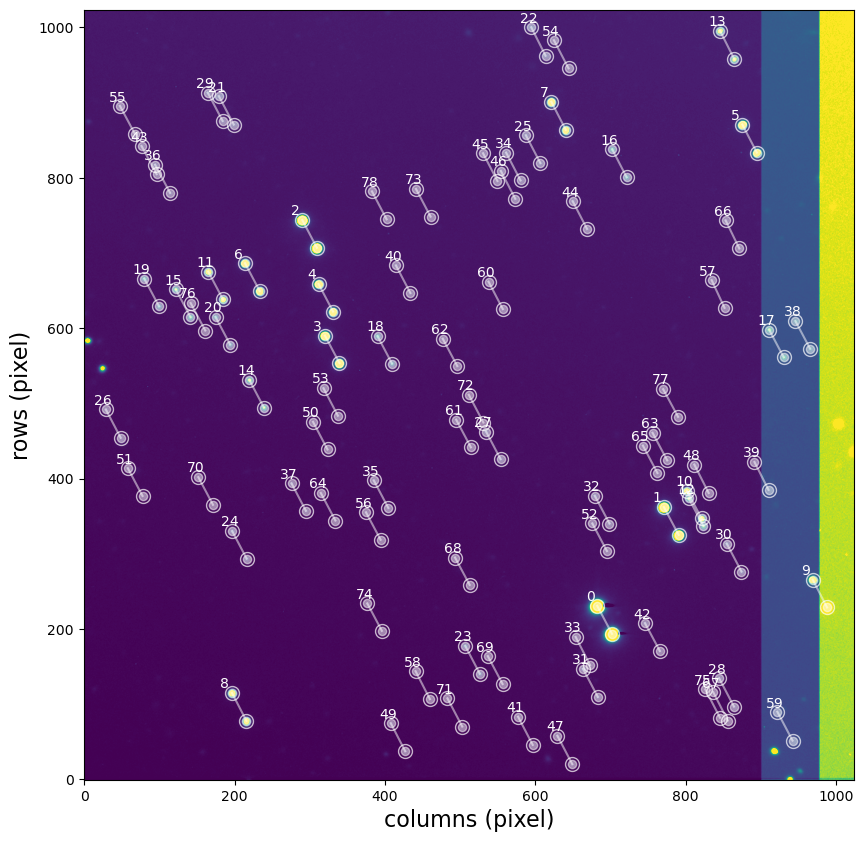

In [18]:
# set channel: 1 (g-band), 2 (r-band), 3 (i-band), or 4 (z-band)
channel = 2

# plot stack to check the stack image of the field and detected sources:
s4plt.plot_sci_polar_frame(s4[channel-1])

### Set index and make a first plot of the polarimetry:

2025-04-29 16:52:44,535 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:52:44,535 | INFO | Normalization disabled.


2025-04-29 16:52:44,579 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-04-29 16:52:44,579 | INFO | Substituting symbol \perp from STIXGeneral


2025-04-29 16:52:44,582 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-04-29 16:52:44,582 | INFO | Substituting symbol \perp from STIXGeneral


2025-04-29 16:52:44,680 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-04-29 16:52:44,680 | INFO | Substituting symbol \perp from STIXGeneral


2025-04-29 16:52:44,685 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-04-29 16:52:44,685 | INFO | Substituting symbol \perp from STIXGeneral


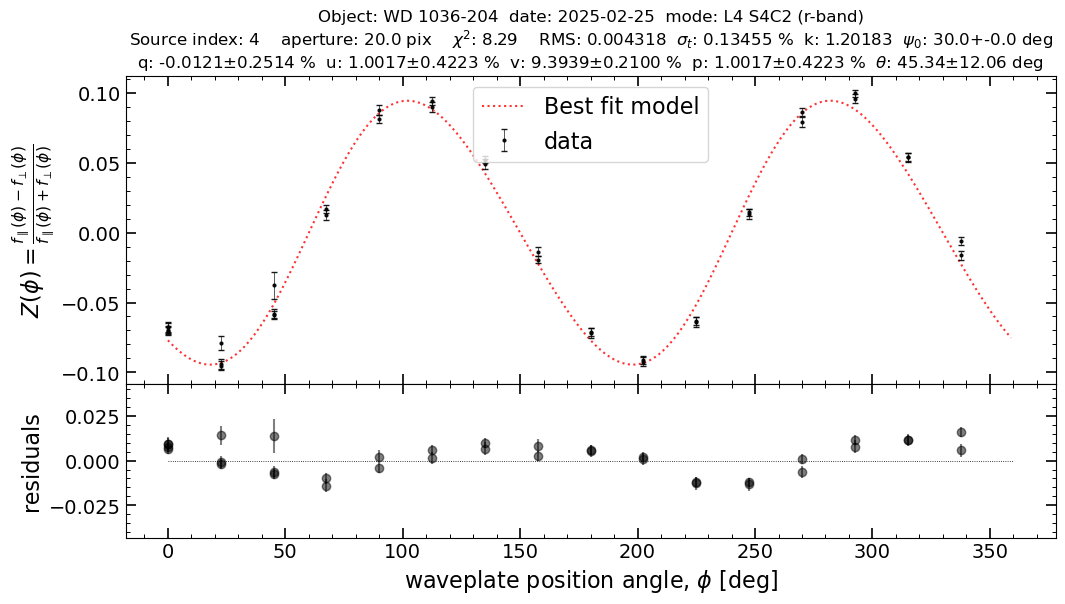

In [32]:
source_index = 4 # set target index
zero_guess = 30 # set zero of waveplate, in degrees

# get polarimetry results for the selected channel, source, and zero value:
pol_results = s4pipelib.get_polarimetry_results(p4[channel-1],
                                                source_index=source_index, 
                                                min_aperture=4,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=False,
                                                zero=zero_guess)

### Select sampling of trial zeros, and set variables 

In [7]:
zeros = np.linspace(0, 180, num=360) # set array of trial zeros
mask = zeros < 200 # mask values to avoid double minima when full range is 360 deg
rms = [np.array([]), np.array([]), np.array([]), np.array([])]
imin = [None, None, None, None]
source_index = [4,4,4,4]
colors = ["lightblue","darkgreen","darkorange","red"]
bands = ["g","r","i","z"]

### Calculate polarimetry for all trial zeros in the four channels

In [8]:
# the loop may take a few minutes to run
for ch in range(1,5) :    
    for i in range(len(zeros)) :
        pol_results = s4pipelib.get_polarimetry_results(p4[ch-1],
                                                source_index=source_index[ch-1],
                                                min_aperture=4,
                                                max_aperture=21,
                                                plot=False,
                                                verbose=False,
                                                zero=zeros[i])
        rms[ch-1] = np.append(rms[ch-1],pol_results['RMS'])

2025-04-29 16:27:24,508 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:24,508 | INFO | Normalization disabled.


2025-04-29 16:27:24,693 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:24,693 | INFO | Normalization disabled.


2025-04-29 16:27:24,918 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:24,918 | INFO | Normalization disabled.


2025-04-29 16:27:25,098 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:25,098 | INFO | Normalization disabled.


2025-04-29 16:27:25,281 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:25,281 | INFO | Normalization disabled.


2025-04-29 16:27:25,505 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:25,505 | INFO | Normalization disabled.


2025-04-29 16:27:25,691 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:25,691 | INFO | Normalization disabled.


2025-04-29 16:27:25,875 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:25,875 | INFO | Normalization disabled.


2025-04-29 16:27:26,109 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:26,109 | INFO | Normalization disabled.


2025-04-29 16:27:26,290 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:26,290 | INFO | Normalization disabled.


2025-04-29 16:27:26,473 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:26,473 | INFO | Normalization disabled.


2025-04-29 16:27:26,700 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:26,700 | INFO | Normalization disabled.


2025-04-29 16:27:26,884 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:26,884 | INFO | Normalization disabled.


2025-04-29 16:27:27,114 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:27,114 | INFO | Normalization disabled.


2025-04-29 16:27:27,295 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:27,295 | INFO | Normalization disabled.


2025-04-29 16:27:27,474 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:27,474 | INFO | Normalization disabled.


2025-04-29 16:27:27,698 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:27,698 | INFO | Normalization disabled.


2025-04-29 16:27:27,878 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:27,878 | INFO | Normalization disabled.


2025-04-29 16:27:28,062 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:28,062 | INFO | Normalization disabled.


2025-04-29 16:27:28,294 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:28,294 | INFO | Normalization disabled.


2025-04-29 16:27:28,480 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:28,480 | INFO | Normalization disabled.


2025-04-29 16:27:28,666 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:28,666 | INFO | Normalization disabled.


2025-04-29 16:27:28,890 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:28,890 | INFO | Normalization disabled.


2025-04-29 16:27:29,074 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:29,074 | INFO | Normalization disabled.


2025-04-29 16:27:29,255 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:29,255 | INFO | Normalization disabled.


2025-04-29 16:27:29,478 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:29,478 | INFO | Normalization disabled.


2025-04-29 16:27:29,661 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:29,661 | INFO | Normalization disabled.


2025-04-29 16:27:29,842 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:29,842 | INFO | Normalization disabled.


2025-04-29 16:27:30,077 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:30,077 | INFO | Normalization disabled.


2025-04-29 16:27:30,259 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:30,259 | INFO | Normalization disabled.


2025-04-29 16:27:30,445 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:30,445 | INFO | Normalization disabled.


2025-04-29 16:27:30,681 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:30,681 | INFO | Normalization disabled.


2025-04-29 16:27:30,865 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:30,865 | INFO | Normalization disabled.


2025-04-29 16:27:31,045 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:31,045 | INFO | Normalization disabled.


2025-04-29 16:27:31,225 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:31,225 | INFO | Normalization disabled.


2025-04-29 16:27:31,453 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:31,453 | INFO | Normalization disabled.


2025-04-29 16:27:31,637 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:31,637 | INFO | Normalization disabled.


2025-04-29 16:27:31,864 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:31,864 | INFO | Normalization disabled.


2025-04-29 16:27:32,050 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:32,050 | INFO | Normalization disabled.


2025-04-29 16:27:32,230 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:32,230 | INFO | Normalization disabled.


2025-04-29 16:27:32,450 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:32,450 | INFO | Normalization disabled.


2025-04-29 16:27:32,635 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:32,635 | INFO | Normalization disabled.


2025-04-29 16:27:32,825 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:32,825 | INFO | Normalization disabled.


2025-04-29 16:27:33,010 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:33,010 | INFO | Normalization disabled.


2025-04-29 16:27:33,249 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:33,249 | INFO | Normalization disabled.


2025-04-29 16:27:33,436 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:33,436 | INFO | Normalization disabled.


2025-04-29 16:27:33,662 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:33,662 | INFO | Normalization disabled.


2025-04-29 16:27:33,845 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:33,845 | INFO | Normalization disabled.


2025-04-29 16:27:34,030 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:34,030 | INFO | Normalization disabled.


2025-04-29 16:27:34,257 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:34,257 | INFO | Normalization disabled.


2025-04-29 16:27:34,438 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:34,438 | INFO | Normalization disabled.


2025-04-29 16:27:34,619 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:34,619 | INFO | Normalization disabled.


2025-04-29 16:27:34,870 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:34,870 | INFO | Normalization disabled.


2025-04-29 16:27:35,076 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:35,076 | INFO | Normalization disabled.


2025-04-29 16:27:35,267 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:35,267 | INFO | Normalization disabled.


2025-04-29 16:27:35,493 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:35,493 | INFO | Normalization disabled.


2025-04-29 16:27:35,679 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:35,679 | INFO | Normalization disabled.


2025-04-29 16:27:35,862 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:35,862 | INFO | Normalization disabled.


2025-04-29 16:27:36,087 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:36,087 | INFO | Normalization disabled.


2025-04-29 16:27:36,279 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:36,279 | INFO | Normalization disabled.


2025-04-29 16:27:36,465 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:36,465 | INFO | Normalization disabled.


2025-04-29 16:27:36,697 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:36,697 | INFO | Normalization disabled.


2025-04-29 16:27:36,885 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:36,885 | INFO | Normalization disabled.


2025-04-29 16:27:37,072 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:37,072 | INFO | Normalization disabled.


2025-04-29 16:27:37,300 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:37,300 | INFO | Normalization disabled.


2025-04-29 16:27:37,487 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:37,487 | INFO | Normalization disabled.


2025-04-29 16:27:37,667 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:37,667 | INFO | Normalization disabled.


2025-04-29 16:27:37,889 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:37,889 | INFO | Normalization disabled.


2025-04-29 16:27:38,076 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:38,076 | INFO | Normalization disabled.


2025-04-29 16:27:38,263 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:38,263 | INFO | Normalization disabled.


2025-04-29 16:27:38,490 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:38,490 | INFO | Normalization disabled.


2025-04-29 16:27:38,675 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:38,675 | INFO | Normalization disabled.


2025-04-29 16:27:38,855 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:38,855 | INFO | Normalization disabled.


2025-04-29 16:27:39,085 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:39,085 | INFO | Normalization disabled.


2025-04-29 16:27:39,274 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:39,274 | INFO | Normalization disabled.


2025-04-29 16:27:39,456 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:39,456 | INFO | Normalization disabled.


2025-04-29 16:27:39,694 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:39,694 | INFO | Normalization disabled.


2025-04-29 16:27:39,877 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:39,877 | INFO | Normalization disabled.


2025-04-29 16:27:40,058 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:40,058 | INFO | Normalization disabled.


2025-04-29 16:27:40,281 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:40,281 | INFO | Normalization disabled.


2025-04-29 16:27:40,468 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:40,468 | INFO | Normalization disabled.


2025-04-29 16:27:40,672 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:40,672 | INFO | Normalization disabled.


2025-04-29 16:27:40,918 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:40,918 | INFO | Normalization disabled.


2025-04-29 16:27:41,107 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:41,107 | INFO | Normalization disabled.


2025-04-29 16:27:41,290 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:41,290 | INFO | Normalization disabled.


2025-04-29 16:27:41,512 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:41,512 | INFO | Normalization disabled.


2025-04-29 16:27:41,708 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:41,708 | INFO | Normalization disabled.


2025-04-29 16:27:41,906 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:41,906 | INFO | Normalization disabled.


2025-04-29 16:27:42,144 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:42,144 | INFO | Normalization disabled.


2025-04-29 16:27:42,334 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:42,334 | INFO | Normalization disabled.


2025-04-29 16:27:42,516 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:42,516 | INFO | Normalization disabled.


2025-04-29 16:27:42,738 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:42,738 | INFO | Normalization disabled.


2025-04-29 16:27:42,923 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:42,923 | INFO | Normalization disabled.


2025-04-29 16:27:43,105 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:43,105 | INFO | Normalization disabled.


2025-04-29 16:27:43,329 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:43,329 | INFO | Normalization disabled.


2025-04-29 16:27:43,515 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:43,515 | INFO | Normalization disabled.


2025-04-29 16:27:43,701 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:43,701 | INFO | Normalization disabled.


2025-04-29 16:27:43,927 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:43,927 | INFO | Normalization disabled.


2025-04-29 16:27:44,113 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:44,113 | INFO | Normalization disabled.


2025-04-29 16:27:44,294 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:44,294 | INFO | Normalization disabled.


2025-04-29 16:27:44,519 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:44,519 | INFO | Normalization disabled.


2025-04-29 16:27:44,707 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:44,707 | INFO | Normalization disabled.


2025-04-29 16:27:44,892 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:44,892 | INFO | Normalization disabled.


2025-04-29 16:27:45,078 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:45,078 | INFO | Normalization disabled.


2025-04-29 16:27:45,298 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:45,298 | INFO | Normalization disabled.


2025-04-29 16:27:45,480 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:45,480 | INFO | Normalization disabled.


2025-04-29 16:27:45,710 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:45,710 | INFO | Normalization disabled.


2025-04-29 16:27:45,896 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:45,896 | INFO | Normalization disabled.


2025-04-29 16:27:46,076 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:46,076 | INFO | Normalization disabled.


2025-04-29 16:27:46,271 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:46,271 | INFO | Normalization disabled.


2025-04-29 16:27:46,519 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:46,519 | INFO | Normalization disabled.


2025-04-29 16:27:46,713 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:46,713 | INFO | Normalization disabled.


2025-04-29 16:27:46,948 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:46,948 | INFO | Normalization disabled.


2025-04-29 16:27:47,148 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:47,148 | INFO | Normalization disabled.


2025-04-29 16:27:47,341 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:47,341 | INFO | Normalization disabled.


2025-04-29 16:27:47,573 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:47,573 | INFO | Normalization disabled.


2025-04-29 16:27:47,756 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:47,756 | INFO | Normalization disabled.


2025-04-29 16:27:47,936 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:47,936 | INFO | Normalization disabled.


2025-04-29 16:27:48,117 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:48,117 | INFO | Normalization disabled.


2025-04-29 16:27:48,337 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:48,337 | INFO | Normalization disabled.


2025-04-29 16:27:48,523 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:48,523 | INFO | Normalization disabled.


2025-04-29 16:27:48,742 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:48,742 | INFO | Normalization disabled.


2025-04-29 16:27:48,928 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:48,928 | INFO | Normalization disabled.


2025-04-29 16:27:49,113 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:49,113 | INFO | Normalization disabled.


2025-04-29 16:27:49,333 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:49,333 | INFO | Normalization disabled.


2025-04-29 16:27:49,514 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:49,514 | INFO | Normalization disabled.


2025-04-29 16:27:49,698 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:49,698 | INFO | Normalization disabled.


2025-04-29 16:27:49,919 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:49,919 | INFO | Normalization disabled.


2025-04-29 16:27:50,105 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:50,105 | INFO | Normalization disabled.


2025-04-29 16:27:50,284 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:50,284 | INFO | Normalization disabled.


2025-04-29 16:27:50,529 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:50,529 | INFO | Normalization disabled.


2025-04-29 16:27:50,730 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:50,730 | INFO | Normalization disabled.


2025-04-29 16:27:50,931 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:50,931 | INFO | Normalization disabled.


2025-04-29 16:27:51,138 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:51,138 | INFO | Normalization disabled.


2025-04-29 16:27:51,361 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:51,361 | INFO | Normalization disabled.


2025-04-29 16:27:51,544 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:51,544 | INFO | Normalization disabled.


2025-04-29 16:27:51,767 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:51,767 | INFO | Normalization disabled.


2025-04-29 16:27:51,963 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:51,963 | INFO | Normalization disabled.


2025-04-29 16:27:52,159 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:52,159 | INFO | Normalization disabled.


2025-04-29 16:27:52,381 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:52,381 | INFO | Normalization disabled.


2025-04-29 16:27:52,563 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:52,563 | INFO | Normalization disabled.


2025-04-29 16:27:52,744 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:52,744 | INFO | Normalization disabled.


2025-04-29 16:27:52,985 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:52,985 | INFO | Normalization disabled.


2025-04-29 16:27:53,181 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:53,181 | INFO | Normalization disabled.


2025-04-29 16:27:53,375 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:53,375 | INFO | Normalization disabled.


2025-04-29 16:27:53,606 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:53,606 | INFO | Normalization disabled.


2025-04-29 16:27:53,792 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:53,792 | INFO | Normalization disabled.


2025-04-29 16:27:53,973 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:53,973 | INFO | Normalization disabled.


2025-04-29 16:27:54,195 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:54,195 | INFO | Normalization disabled.


2025-04-29 16:27:54,378 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:54,378 | INFO | Normalization disabled.


2025-04-29 16:27:54,559 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:54,559 | INFO | Normalization disabled.


2025-04-29 16:27:54,804 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:54,804 | INFO | Normalization disabled.


2025-04-29 16:27:55,002 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:55,002 | INFO | Normalization disabled.


2025-04-29 16:27:55,192 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:55,192 | INFO | Normalization disabled.


2025-04-29 16:27:55,416 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:55,416 | INFO | Normalization disabled.


2025-04-29 16:27:55,602 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:55,602 | INFO | Normalization disabled.


2025-04-29 16:27:55,798 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:55,798 | INFO | Normalization disabled.


2025-04-29 16:27:55,996 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:55,996 | INFO | Normalization disabled.


2025-04-29 16:27:56,233 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:56,233 | INFO | Normalization disabled.


2025-04-29 16:27:56,416 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:56,416 | INFO | Normalization disabled.


2025-04-29 16:27:56,599 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:56,599 | INFO | Normalization disabled.


2025-04-29 16:27:56,824 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:56,824 | INFO | Normalization disabled.


2025-04-29 16:27:57,008 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:57,008 | INFO | Normalization disabled.


2025-04-29 16:27:57,253 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:57,253 | INFO | Normalization disabled.


2025-04-29 16:27:57,451 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:57,451 | INFO | Normalization disabled.


2025-04-29 16:27:57,644 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:57,644 | INFO | Normalization disabled.


2025-04-29 16:27:57,889 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:57,889 | INFO | Normalization disabled.


2025-04-29 16:27:58,081 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:58,081 | INFO | Normalization disabled.


2025-04-29 16:27:58,267 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:58,267 | INFO | Normalization disabled.


2025-04-29 16:27:58,510 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:58,510 | INFO | Normalization disabled.


2025-04-29 16:27:58,700 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:58,700 | INFO | Normalization disabled.


2025-04-29 16:27:58,887 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:58,887 | INFO | Normalization disabled.


2025-04-29 16:27:59,133 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:59,133 | INFO | Normalization disabled.


2025-04-29 16:27:59,325 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:59,325 | INFO | Normalization disabled.


2025-04-29 16:27:59,518 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:59,518 | INFO | Normalization disabled.


2025-04-29 16:27:59,761 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:59,761 | INFO | Normalization disabled.


2025-04-29 16:27:59,954 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:27:59,954 | INFO | Normalization disabled.


2025-04-29 16:28:00,137 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:00,137 | INFO | Normalization disabled.


2025-04-29 16:28:00,362 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:00,362 | INFO | Normalization disabled.


2025-04-29 16:28:00,545 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:00,545 | INFO | Normalization disabled.


2025-04-29 16:28:00,727 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:00,727 | INFO | Normalization disabled.


2025-04-29 16:28:00,953 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:00,953 | INFO | Normalization disabled.


2025-04-29 16:28:01,135 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:01,135 | INFO | Normalization disabled.


2025-04-29 16:28:01,324 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:01,324 | INFO | Normalization disabled.


2025-04-29 16:28:01,573 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:01,573 | INFO | Normalization disabled.


2025-04-29 16:28:01,770 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:01,770 | INFO | Normalization disabled.


2025-04-29 16:28:01,957 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:01,957 | INFO | Normalization disabled.


2025-04-29 16:28:02,197 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:02,197 | INFO | Normalization disabled.


2025-04-29 16:28:02,395 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:02,395 | INFO | Normalization disabled.


2025-04-29 16:28:02,591 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:02,591 | INFO | Normalization disabled.


2025-04-29 16:28:02,822 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:02,822 | INFO | Normalization disabled.


2025-04-29 16:28:03,026 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:03,026 | INFO | Normalization disabled.


2025-04-29 16:28:03,225 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:03,225 | INFO | Normalization disabled.


2025-04-29 16:28:03,459 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:03,459 | INFO | Normalization disabled.


2025-04-29 16:28:03,645 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:03,645 | INFO | Normalization disabled.


2025-04-29 16:28:03,827 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:03,827 | INFO | Normalization disabled.


2025-04-29 16:28:04,019 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:04,019 | INFO | Normalization disabled.


2025-04-29 16:28:04,255 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:04,255 | INFO | Normalization disabled.


2025-04-29 16:28:04,437 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:04,437 | INFO | Normalization disabled.


2025-04-29 16:28:04,659 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:04,659 | INFO | Normalization disabled.


2025-04-29 16:28:04,841 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:04,841 | INFO | Normalization disabled.


2025-04-29 16:28:05,022 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:05,022 | INFO | Normalization disabled.


2025-04-29 16:28:05,249 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:05,249 | INFO | Normalization disabled.


2025-04-29 16:28:05,435 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:05,435 | INFO | Normalization disabled.


2025-04-29 16:28:05,621 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:05,621 | INFO | Normalization disabled.


2025-04-29 16:28:05,858 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:05,858 | INFO | Normalization disabled.


2025-04-29 16:28:06,052 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:06,052 | INFO | Normalization disabled.


2025-04-29 16:28:06,240 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:06,240 | INFO | Normalization disabled.


2025-04-29 16:28:06,467 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:06,467 | INFO | Normalization disabled.


2025-04-29 16:28:06,654 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:06,654 | INFO | Normalization disabled.


2025-04-29 16:28:06,842 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:06,842 | INFO | Normalization disabled.


2025-04-29 16:28:07,067 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:07,067 | INFO | Normalization disabled.


2025-04-29 16:28:07,248 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:07,248 | INFO | Normalization disabled.


2025-04-29 16:28:07,439 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:07,439 | INFO | Normalization disabled.


2025-04-29 16:28:07,678 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:07,678 | INFO | Normalization disabled.


2025-04-29 16:28:07,871 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:07,871 | INFO | Normalization disabled.


2025-04-29 16:28:08,059 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:08,059 | INFO | Normalization disabled.


2025-04-29 16:28:08,281 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:08,281 | INFO | Normalization disabled.


2025-04-29 16:28:08,467 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:08,467 | INFO | Normalization disabled.


2025-04-29 16:28:08,656 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:08,656 | INFO | Normalization disabled.


2025-04-29 16:28:08,885 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:08,885 | INFO | Normalization disabled.


2025-04-29 16:28:09,077 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:09,077 | INFO | Normalization disabled.


2025-04-29 16:28:09,267 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:09,267 | INFO | Normalization disabled.


2025-04-29 16:28:09,491 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:09,491 | INFO | Normalization disabled.


2025-04-29 16:28:09,682 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:09,682 | INFO | Normalization disabled.


2025-04-29 16:28:09,876 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:09,876 | INFO | Normalization disabled.


2025-04-29 16:28:10,116 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:10,116 | INFO | Normalization disabled.


2025-04-29 16:28:10,308 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:10,308 | INFO | Normalization disabled.


2025-04-29 16:28:10,501 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:10,501 | INFO | Normalization disabled.


2025-04-29 16:28:10,745 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:10,745 | INFO | Normalization disabled.


2025-04-29 16:28:10,943 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:10,943 | INFO | Normalization disabled.


2025-04-29 16:28:11,141 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:11,141 | INFO | Normalization disabled.


2025-04-29 16:28:11,391 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:11,391 | INFO | Normalization disabled.


2025-04-29 16:28:11,585 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:11,585 | INFO | Normalization disabled.


2025-04-29 16:28:11,772 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:11,772 | INFO | Normalization disabled.


2025-04-29 16:28:11,994 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:11,994 | INFO | Normalization disabled.


2025-04-29 16:28:12,192 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:12,192 | INFO | Normalization disabled.


2025-04-29 16:28:12,389 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:12,389 | INFO | Normalization disabled.


2025-04-29 16:28:12,630 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:12,630 | INFO | Normalization disabled.


2025-04-29 16:28:12,824 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:12,824 | INFO | Normalization disabled.


2025-04-29 16:28:13,056 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:13,056 | INFO | Normalization disabled.


2025-04-29 16:28:13,239 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:13,239 | INFO | Normalization disabled.


2025-04-29 16:28:13,421 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:13,421 | INFO | Normalization disabled.


2025-04-29 16:28:13,667 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:13,667 | INFO | Normalization disabled.


2025-04-29 16:28:13,862 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:13,862 | INFO | Normalization disabled.


2025-04-29 16:28:14,059 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:14,059 | INFO | Normalization disabled.


2025-04-29 16:28:14,287 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:14,287 | INFO | Normalization disabled.


2025-04-29 16:28:14,475 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:14,475 | INFO | Normalization disabled.


2025-04-29 16:28:14,659 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:14,659 | INFO | Normalization disabled.


2025-04-29 16:28:14,896 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:14,896 | INFO | Normalization disabled.


2025-04-29 16:28:15,105 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:15,105 | INFO | Normalization disabled.


2025-04-29 16:28:15,305 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:15,305 | INFO | Normalization disabled.


2025-04-29 16:28:15,508 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:15,508 | INFO | Normalization disabled.


2025-04-29 16:28:15,746 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:15,746 | INFO | Normalization disabled.


2025-04-29 16:28:15,936 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:15,936 | INFO | Normalization disabled.


2025-04-29 16:28:16,160 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:16,160 | INFO | Normalization disabled.


2025-04-29 16:28:16,346 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:16,346 | INFO | Normalization disabled.


2025-04-29 16:28:16,546 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:16,546 | INFO | Normalization disabled.


2025-04-29 16:28:16,783 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:16,783 | INFO | Normalization disabled.


2025-04-29 16:28:16,980 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:16,980 | INFO | Normalization disabled.


2025-04-29 16:28:17,178 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:17,178 | INFO | Normalization disabled.


2025-04-29 16:28:17,374 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:17,374 | INFO | Normalization disabled.


2025-04-29 16:28:17,611 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:17,611 | INFO | Normalization disabled.


2025-04-29 16:28:17,802 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:17,802 | INFO | Normalization disabled.


2025-04-29 16:28:18,024 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:18,024 | INFO | Normalization disabled.


2025-04-29 16:28:18,212 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:18,212 | INFO | Normalization disabled.


2025-04-29 16:28:18,434 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:18,434 | INFO | Normalization disabled.


2025-04-29 16:28:18,701 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:18,701 | INFO | Normalization disabled.


2025-04-29 16:28:18,913 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:18,913 | INFO | Normalization disabled.


2025-04-29 16:28:19,118 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:19,118 | INFO | Normalization disabled.


2025-04-29 16:28:19,348 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:19,348 | INFO | Normalization disabled.


2025-04-29 16:28:19,534 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:19,534 | INFO | Normalization disabled.


2025-04-29 16:28:19,731 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:19,731 | INFO | Normalization disabled.


2025-04-29 16:28:19,919 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:19,919 | INFO | Normalization disabled.


2025-04-29 16:28:20,146 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:20,146 | INFO | Normalization disabled.


2025-04-29 16:28:20,333 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:20,333 | INFO | Normalization disabled.


2025-04-29 16:28:20,556 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:20,556 | INFO | Normalization disabled.


2025-04-29 16:28:20,738 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:20,738 | INFO | Normalization disabled.


2025-04-29 16:28:20,920 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:20,920 | INFO | Normalization disabled.


2025-04-29 16:28:21,165 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:21,165 | INFO | Normalization disabled.


2025-04-29 16:28:21,368 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:21,368 | INFO | Normalization disabled.


2025-04-29 16:28:21,568 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:21,568 | INFO | Normalization disabled.


2025-04-29 16:28:21,817 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:21,817 | INFO | Normalization disabled.


2025-04-29 16:28:22,014 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:22,014 | INFO | Normalization disabled.


2025-04-29 16:28:22,197 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:22,197 | INFO | Normalization disabled.


2025-04-29 16:28:22,419 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:22,419 | INFO | Normalization disabled.


2025-04-29 16:28:22,601 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:22,601 | INFO | Normalization disabled.


2025-04-29 16:28:22,790 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:22,790 | INFO | Normalization disabled.


2025-04-29 16:28:23,042 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:23,042 | INFO | Normalization disabled.


2025-04-29 16:28:23,234 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:23,234 | INFO | Normalization disabled.


2025-04-29 16:28:23,429 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:23,429 | INFO | Normalization disabled.


2025-04-29 16:28:23,678 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:23,678 | INFO | Normalization disabled.


2025-04-29 16:28:23,877 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:23,877 | INFO | Normalization disabled.


2025-04-29 16:28:24,075 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:24,075 | INFO | Normalization disabled.


2025-04-29 16:28:24,312 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:24,312 | INFO | Normalization disabled.


2025-04-29 16:28:24,506 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:24,506 | INFO | Normalization disabled.


2025-04-29 16:28:24,741 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:24,741 | INFO | Normalization disabled.


2025-04-29 16:28:24,928 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:24,928 | INFO | Normalization disabled.


2025-04-29 16:28:25,110 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:25,110 | INFO | Normalization disabled.


2025-04-29 16:28:25,292 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:25,292 | INFO | Normalization disabled.


2025-04-29 16:28:25,517 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:25,517 | INFO | Normalization disabled.


2025-04-29 16:28:25,700 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:25,700 | INFO | Normalization disabled.


2025-04-29 16:28:25,882 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:25,882 | INFO | Normalization disabled.


2025-04-29 16:28:26,108 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:26,108 | INFO | Normalization disabled.


2025-04-29 16:28:26,291 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:26,291 | INFO | Normalization disabled.


2025-04-29 16:28:26,515 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:26,515 | INFO | Normalization disabled.


2025-04-29 16:28:26,702 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:26,702 | INFO | Normalization disabled.


2025-04-29 16:28:26,889 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:26,889 | INFO | Normalization disabled.


2025-04-29 16:28:27,110 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:27,110 | INFO | Normalization disabled.


2025-04-29 16:28:27,296 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:27,296 | INFO | Normalization disabled.


2025-04-29 16:28:27,477 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:27,477 | INFO | Normalization disabled.


2025-04-29 16:28:27,702 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:27,702 | INFO | Normalization disabled.


2025-04-29 16:28:27,886 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:27,886 | INFO | Normalization disabled.


2025-04-29 16:28:28,068 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:28,068 | INFO | Normalization disabled.


2025-04-29 16:28:28,288 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:28,288 | INFO | Normalization disabled.


2025-04-29 16:28:28,478 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:28,478 | INFO | Normalization disabled.


2025-04-29 16:28:28,665 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:28,665 | INFO | Normalization disabled.


2025-04-29 16:28:28,888 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:28,888 | INFO | Normalization disabled.


2025-04-29 16:28:29,074 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:29,074 | INFO | Normalization disabled.


2025-04-29 16:28:29,255 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:29,255 | INFO | Normalization disabled.


2025-04-29 16:28:29,476 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:29,476 | INFO | Normalization disabled.


2025-04-29 16:28:29,659 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:29,659 | INFO | Normalization disabled.


2025-04-29 16:28:29,840 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:29,840 | INFO | Normalization disabled.


2025-04-29 16:28:30,061 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:30,061 | INFO | Normalization disabled.


2025-04-29 16:28:30,242 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:30,242 | INFO | Normalization disabled.


2025-04-29 16:28:30,424 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:30,424 | INFO | Normalization disabled.


2025-04-29 16:28:30,644 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:30,644 | INFO | Normalization disabled.


2025-04-29 16:28:30,827 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:30,827 | INFO | Normalization disabled.


2025-04-29 16:28:31,007 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:31,007 | INFO | Normalization disabled.


2025-04-29 16:28:31,228 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:31,228 | INFO | Normalization disabled.


2025-04-29 16:28:31,410 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:31,410 | INFO | Normalization disabled.


2025-04-29 16:28:31,598 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:31,598 | INFO | Normalization disabled.


2025-04-29 16:28:31,822 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:31,822 | INFO | Normalization disabled.


2025-04-29 16:28:32,004 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:32,004 | INFO | Normalization disabled.


2025-04-29 16:28:32,190 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:32,190 | INFO | Normalization disabled.


2025-04-29 16:28:32,411 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:32,411 | INFO | Normalization disabled.


2025-04-29 16:28:32,592 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:32,592 | INFO | Normalization disabled.


2025-04-29 16:28:32,774 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:32,774 | INFO | Normalization disabled.


2025-04-29 16:28:32,999 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:32,999 | INFO | Normalization disabled.


2025-04-29 16:28:33,185 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:33,185 | INFO | Normalization disabled.


2025-04-29 16:28:33,367 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:33,367 | INFO | Normalization disabled.


2025-04-29 16:28:33,592 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:33,592 | INFO | Normalization disabled.


2025-04-29 16:28:33,778 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:33,778 | INFO | Normalization disabled.


2025-04-29 16:28:33,959 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:33,959 | INFO | Normalization disabled.


2025-04-29 16:28:34,189 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:34,189 | INFO | Normalization disabled.


2025-04-29 16:28:34,374 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:34,374 | INFO | Normalization disabled.


2025-04-29 16:28:34,556 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:34,556 | INFO | Normalization disabled.


2025-04-29 16:28:34,782 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:34,782 | INFO | Normalization disabled.


2025-04-29 16:28:34,965 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:34,965 | INFO | Normalization disabled.


2025-04-29 16:28:35,154 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:35,154 | INFO | Normalization disabled.


2025-04-29 16:28:35,374 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:35,374 | INFO | Normalization disabled.


2025-04-29 16:28:35,557 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:35,557 | INFO | Normalization disabled.


2025-04-29 16:28:35,778 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:35,778 | INFO | Normalization disabled.


2025-04-29 16:28:35,965 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:35,965 | INFO | Normalization disabled.


2025-04-29 16:28:36,149 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:36,149 | INFO | Normalization disabled.


2025-04-29 16:28:36,336 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:36,336 | INFO | Normalization disabled.


2025-04-29 16:28:36,563 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:36,563 | INFO | Normalization disabled.


2025-04-29 16:28:36,745 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:36,745 | INFO | Normalization disabled.


2025-04-29 16:28:36,929 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:36,929 | INFO | Normalization disabled.


2025-04-29 16:28:37,153 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:37,153 | INFO | Normalization disabled.


2025-04-29 16:28:37,339 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:37,339 | INFO | Normalization disabled.


2025-04-29 16:28:37,560 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:37,560 | INFO | Normalization disabled.


2025-04-29 16:28:37,745 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:37,745 | INFO | Normalization disabled.


2025-04-29 16:28:37,941 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:37,941 | INFO | Normalization disabled.


2025-04-29 16:28:38,179 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:38,179 | INFO | Normalization disabled.


2025-04-29 16:28:38,364 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:38,364 | INFO | Normalization disabled.


2025-04-29 16:28:38,553 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:38,553 | INFO | Normalization disabled.


2025-04-29 16:28:38,785 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:38,785 | INFO | Normalization disabled.


2025-04-29 16:28:38,973 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:38,973 | INFO | Normalization disabled.


2025-04-29 16:28:39,155 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:39,155 | INFO | Normalization disabled.


2025-04-29 16:28:39,386 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:39,386 | INFO | Normalization disabled.


2025-04-29 16:28:39,569 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:39,569 | INFO | Normalization disabled.


2025-04-29 16:28:39,752 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:39,752 | INFO | Normalization disabled.


2025-04-29 16:28:39,979 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:39,979 | INFO | Normalization disabled.


2025-04-29 16:28:40,162 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:40,162 | INFO | Normalization disabled.


2025-04-29 16:28:40,343 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:40,343 | INFO | Normalization disabled.


2025-04-29 16:28:40,569 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:40,569 | INFO | Normalization disabled.


2025-04-29 16:28:40,757 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:40,757 | INFO | Normalization disabled.


2025-04-29 16:28:40,944 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:40,944 | INFO | Normalization disabled.


2025-04-29 16:28:41,175 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:41,175 | INFO | Normalization disabled.


2025-04-29 16:28:41,366 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:41,366 | INFO | Normalization disabled.


2025-04-29 16:28:41,550 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:41,550 | INFO | Normalization disabled.


2025-04-29 16:28:41,777 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:41,777 | INFO | Normalization disabled.


2025-04-29 16:28:41,971 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:41,971 | INFO | Normalization disabled.


2025-04-29 16:28:42,153 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:42,153 | INFO | Normalization disabled.


2025-04-29 16:28:42,376 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:42,376 | INFO | Normalization disabled.


2025-04-29 16:28:42,567 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:42,567 | INFO | Normalization disabled.


2025-04-29 16:28:42,750 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:42,750 | INFO | Normalization disabled.


2025-04-29 16:28:42,980 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:42,980 | INFO | Normalization disabled.


2025-04-29 16:28:43,163 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:43,163 | INFO | Normalization disabled.


2025-04-29 16:28:43,346 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:43,346 | INFO | Normalization disabled.


2025-04-29 16:28:43,576 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:43,576 | INFO | Normalization disabled.


2025-04-29 16:28:43,763 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:43,763 | INFO | Normalization disabled.


2025-04-29 16:28:43,945 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:43,945 | INFO | Normalization disabled.


2025-04-29 16:28:44,171 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:44,171 | INFO | Normalization disabled.


2025-04-29 16:28:44,357 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:44,357 | INFO | Normalization disabled.


2025-04-29 16:28:44,582 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:44,582 | INFO | Normalization disabled.


2025-04-29 16:28:44,769 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:44,769 | INFO | Normalization disabled.


2025-04-29 16:28:44,958 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:44,958 | INFO | Normalization disabled.


2025-04-29 16:28:45,183 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:45,183 | INFO | Normalization disabled.


2025-04-29 16:28:45,372 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:45,372 | INFO | Normalization disabled.


2025-04-29 16:28:45,558 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:45,558 | INFO | Normalization disabled.


2025-04-29 16:28:45,790 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:45,790 | INFO | Normalization disabled.


2025-04-29 16:28:45,982 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:45,982 | INFO | Normalization disabled.


2025-04-29 16:28:46,167 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:46,167 | INFO | Normalization disabled.


2025-04-29 16:28:46,395 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:46,395 | INFO | Normalization disabled.


2025-04-29 16:28:46,580 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:46,580 | INFO | Normalization disabled.


2025-04-29 16:28:46,769 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:46,769 | INFO | Normalization disabled.


2025-04-29 16:28:46,991 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:46,991 | INFO | Normalization disabled.


2025-04-29 16:28:47,182 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:47,182 | INFO | Normalization disabled.


2025-04-29 16:28:47,380 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:47,380 | INFO | Normalization disabled.


2025-04-29 16:28:47,608 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:47,608 | INFO | Normalization disabled.


2025-04-29 16:28:47,791 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:47,791 | INFO | Normalization disabled.


2025-04-29 16:28:47,976 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:47,976 | INFO | Normalization disabled.


2025-04-29 16:28:48,202 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:48,202 | INFO | Normalization disabled.


2025-04-29 16:28:48,387 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:48,387 | INFO | Normalization disabled.


2025-04-29 16:28:48,589 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:48,589 | INFO | Normalization disabled.


2025-04-29 16:28:48,813 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:48,813 | INFO | Normalization disabled.


2025-04-29 16:28:49,000 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:49,000 | INFO | Normalization disabled.


2025-04-29 16:28:49,230 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:49,230 | INFO | Normalization disabled.


2025-04-29 16:28:49,417 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:49,417 | INFO | Normalization disabled.


2025-04-29 16:28:49,603 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:49,603 | INFO | Normalization disabled.


2025-04-29 16:28:49,831 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:49,831 | INFO | Normalization disabled.


2025-04-29 16:28:50,020 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:50,020 | INFO | Normalization disabled.


2025-04-29 16:28:50,208 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:50,208 | INFO | Normalization disabled.


2025-04-29 16:28:50,439 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:50,439 | INFO | Normalization disabled.


2025-04-29 16:28:50,623 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:50,623 | INFO | Normalization disabled.


2025-04-29 16:28:50,808 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:50,808 | INFO | Normalization disabled.


2025-04-29 16:28:51,038 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:51,038 | INFO | Normalization disabled.


2025-04-29 16:28:51,224 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:51,224 | INFO | Normalization disabled.


2025-04-29 16:28:51,405 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:51,405 | INFO | Normalization disabled.


2025-04-29 16:28:51,629 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:51,629 | INFO | Normalization disabled.


2025-04-29 16:28:51,815 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:51,815 | INFO | Normalization disabled.


2025-04-29 16:28:52,008 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:52,008 | INFO | Normalization disabled.


2025-04-29 16:28:52,231 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:52,231 | INFO | Normalization disabled.


2025-04-29 16:28:52,422 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:52,422 | INFO | Normalization disabled.


2025-04-29 16:28:52,619 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:52,619 | INFO | Normalization disabled.


2025-04-29 16:28:52,857 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:52,857 | INFO | Normalization disabled.


2025-04-29 16:28:53,041 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:53,041 | INFO | Normalization disabled.


2025-04-29 16:28:53,236 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:53,236 | INFO | Normalization disabled.


2025-04-29 16:28:53,489 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:53,489 | INFO | Normalization disabled.


2025-04-29 16:28:53,690 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:53,690 | INFO | Normalization disabled.


2025-04-29 16:28:53,890 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:53,890 | INFO | Normalization disabled.


2025-04-29 16:28:54,140 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:54,140 | INFO | Normalization disabled.


2025-04-29 16:28:54,335 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:54,335 | INFO | Normalization disabled.


2025-04-29 16:28:54,531 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:54,531 | INFO | Normalization disabled.


2025-04-29 16:28:54,775 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:54,775 | INFO | Normalization disabled.


2025-04-29 16:28:54,976 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:54,976 | INFO | Normalization disabled.


2025-04-29 16:28:55,170 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:55,170 | INFO | Normalization disabled.


2025-04-29 16:28:55,418 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:55,418 | INFO | Normalization disabled.


2025-04-29 16:28:55,612 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:55,612 | INFO | Normalization disabled.


2025-04-29 16:28:55,807 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:55,807 | INFO | Normalization disabled.


2025-04-29 16:28:56,062 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:56,062 | INFO | Normalization disabled.


2025-04-29 16:28:56,270 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:56,270 | INFO | Normalization disabled.


2025-04-29 16:28:56,476 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:56,476 | INFO | Normalization disabled.


2025-04-29 16:28:56,730 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:56,730 | INFO | Normalization disabled.


2025-04-29 16:28:56,928 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:56,928 | INFO | Normalization disabled.


2025-04-29 16:28:57,115 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:57,115 | INFO | Normalization disabled.


2025-04-29 16:28:57,369 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:57,369 | INFO | Normalization disabled.


2025-04-29 16:28:57,579 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:57,579 | INFO | Normalization disabled.


2025-04-29 16:28:57,784 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:57,784 | INFO | Normalization disabled.


2025-04-29 16:28:58,020 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:58,020 | INFO | Normalization disabled.


2025-04-29 16:28:58,226 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:58,226 | INFO | Normalization disabled.


2025-04-29 16:28:58,431 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:58,431 | INFO | Normalization disabled.


2025-04-29 16:28:58,686 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:58,686 | INFO | Normalization disabled.


2025-04-29 16:28:58,882 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:58,882 | INFO | Normalization disabled.


2025-04-29 16:28:59,069 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:59,069 | INFO | Normalization disabled.


2025-04-29 16:28:59,317 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:59,317 | INFO | Normalization disabled.


2025-04-29 16:28:59,514 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:59,514 | INFO | Normalization disabled.


2025-04-29 16:28:59,711 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:59,711 | INFO | Normalization disabled.


2025-04-29 16:28:59,952 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:28:59,952 | INFO | Normalization disabled.


2025-04-29 16:29:00,155 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:00,155 | INFO | Normalization disabled.


2025-04-29 16:29:00,348 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:00,348 | INFO | Normalization disabled.


2025-04-29 16:29:00,591 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:00,591 | INFO | Normalization disabled.


2025-04-29 16:29:00,787 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:00,787 | INFO | Normalization disabled.


2025-04-29 16:29:00,984 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:00,984 | INFO | Normalization disabled.


2025-04-29 16:29:01,225 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:01,225 | INFO | Normalization disabled.


2025-04-29 16:29:01,428 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:01,428 | INFO | Normalization disabled.


2025-04-29 16:29:01,628 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:01,628 | INFO | Normalization disabled.


2025-04-29 16:29:01,855 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:01,855 | INFO | Normalization disabled.


2025-04-29 16:29:02,041 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:02,041 | INFO | Normalization disabled.


2025-04-29 16:29:02,229 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:02,229 | INFO | Normalization disabled.


2025-04-29 16:29:02,462 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:02,462 | INFO | Normalization disabled.


2025-04-29 16:29:02,650 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:02,650 | INFO | Normalization disabled.


2025-04-29 16:29:02,833 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:02,833 | INFO | Normalization disabled.


2025-04-29 16:29:03,076 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:03,076 | INFO | Normalization disabled.


2025-04-29 16:29:03,270 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:03,270 | INFO | Normalization disabled.


2025-04-29 16:29:03,456 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:03,456 | INFO | Normalization disabled.


2025-04-29 16:29:03,685 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:03,685 | INFO | Normalization disabled.


2025-04-29 16:29:03,876 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:03,876 | INFO | Normalization disabled.


2025-04-29 16:29:04,059 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:04,059 | INFO | Normalization disabled.


2025-04-29 16:29:04,283 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:04,283 | INFO | Normalization disabled.


2025-04-29 16:29:04,469 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:04,469 | INFO | Normalization disabled.


2025-04-29 16:29:04,664 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:04,664 | INFO | Normalization disabled.


2025-04-29 16:29:04,854 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:04,854 | INFO | Normalization disabled.


2025-04-29 16:29:05,075 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:05,075 | INFO | Normalization disabled.


2025-04-29 16:29:05,262 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:05,262 | INFO | Normalization disabled.


2025-04-29 16:29:05,447 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:05,447 | INFO | Normalization disabled.


2025-04-29 16:29:05,667 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:05,667 | INFO | Normalization disabled.


2025-04-29 16:29:05,854 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:05,854 | INFO | Normalization disabled.


2025-04-29 16:29:06,095 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:06,095 | INFO | Normalization disabled.


2025-04-29 16:29:06,277 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:06,277 | INFO | Normalization disabled.


2025-04-29 16:29:06,459 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:06,459 | INFO | Normalization disabled.


2025-04-29 16:29:06,692 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:06,692 | INFO | Normalization disabled.


2025-04-29 16:29:06,876 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:06,876 | INFO | Normalization disabled.


2025-04-29 16:29:07,059 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:07,059 | INFO | Normalization disabled.


2025-04-29 16:29:07,286 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:07,286 | INFO | Normalization disabled.


2025-04-29 16:29:07,468 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:07,468 | INFO | Normalization disabled.


2025-04-29 16:29:07,653 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:07,653 | INFO | Normalization disabled.


2025-04-29 16:29:07,888 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:07,888 | INFO | Normalization disabled.


2025-04-29 16:29:08,077 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:08,077 | INFO | Normalization disabled.


2025-04-29 16:29:08,260 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:08,260 | INFO | Normalization disabled.


2025-04-29 16:29:08,483 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:08,483 | INFO | Normalization disabled.


2025-04-29 16:29:08,665 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:08,665 | INFO | Normalization disabled.


2025-04-29 16:29:08,851 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:08,851 | INFO | Normalization disabled.


2025-04-29 16:29:09,077 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:09,077 | INFO | Normalization disabled.


2025-04-29 16:29:09,259 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:09,259 | INFO | Normalization disabled.


2025-04-29 16:29:09,442 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:09,442 | INFO | Normalization disabled.


2025-04-29 16:29:09,666 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:09,666 | INFO | Normalization disabled.


2025-04-29 16:29:09,851 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:09,851 | INFO | Normalization disabled.


2025-04-29 16:29:10,033 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:10,033 | INFO | Normalization disabled.


2025-04-29 16:29:10,254 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:10,254 | INFO | Normalization disabled.


2025-04-29 16:29:10,436 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:10,436 | INFO | Normalization disabled.


2025-04-29 16:29:10,617 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:10,617 | INFO | Normalization disabled.


2025-04-29 16:29:10,843 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:10,843 | INFO | Normalization disabled.


2025-04-29 16:29:11,030 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:11,030 | INFO | Normalization disabled.


2025-04-29 16:29:11,217 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:11,217 | INFO | Normalization disabled.


2025-04-29 16:29:11,446 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:11,446 | INFO | Normalization disabled.


2025-04-29 16:29:11,630 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:11,630 | INFO | Normalization disabled.


2025-04-29 16:29:11,811 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:11,811 | INFO | Normalization disabled.


2025-04-29 16:29:12,033 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:12,033 | INFO | Normalization disabled.


2025-04-29 16:29:12,215 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:12,215 | INFO | Normalization disabled.


2025-04-29 16:29:12,400 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:12,400 | INFO | Normalization disabled.


2025-04-29 16:29:12,624 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:12,624 | INFO | Normalization disabled.


2025-04-29 16:29:12,807 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:12,807 | INFO | Normalization disabled.


2025-04-29 16:29:12,996 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:12,996 | INFO | Normalization disabled.


2025-04-29 16:29:13,227 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:13,227 | INFO | Normalization disabled.


2025-04-29 16:29:13,411 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:13,411 | INFO | Normalization disabled.


2025-04-29 16:29:13,597 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:13,597 | INFO | Normalization disabled.


2025-04-29 16:29:13,822 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:13,822 | INFO | Normalization disabled.


2025-04-29 16:29:14,005 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:14,005 | INFO | Normalization disabled.


2025-04-29 16:29:14,192 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:14,192 | INFO | Normalization disabled.


2025-04-29 16:29:14,415 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:14,415 | INFO | Normalization disabled.


2025-04-29 16:29:14,597 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:14,597 | INFO | Normalization disabled.


2025-04-29 16:29:14,778 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:14,778 | INFO | Normalization disabled.


2025-04-29 16:29:15,005 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:15,005 | INFO | Normalization disabled.


2025-04-29 16:29:15,195 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:15,195 | INFO | Normalization disabled.


2025-04-29 16:29:15,380 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:15,380 | INFO | Normalization disabled.


2025-04-29 16:29:15,609 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:15,609 | INFO | Normalization disabled.


2025-04-29 16:29:15,793 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:15,793 | INFO | Normalization disabled.


2025-04-29 16:29:15,976 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:15,976 | INFO | Normalization disabled.


2025-04-29 16:29:16,206 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:16,206 | INFO | Normalization disabled.


2025-04-29 16:29:16,387 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:16,387 | INFO | Normalization disabled.


2025-04-29 16:29:16,575 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:16,575 | INFO | Normalization disabled.


2025-04-29 16:29:16,804 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:16,804 | INFO | Normalization disabled.


2025-04-29 16:29:16,986 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:16,986 | INFO | Normalization disabled.


2025-04-29 16:29:17,176 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:17,176 | INFO | Normalization disabled.


2025-04-29 16:29:17,405 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:17,405 | INFO | Normalization disabled.


2025-04-29 16:29:17,596 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:17,596 | INFO | Normalization disabled.


2025-04-29 16:29:17,782 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:17,782 | INFO | Normalization disabled.


2025-04-29 16:29:17,969 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:17,969 | INFO | Normalization disabled.


2025-04-29 16:29:18,190 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:18,190 | INFO | Normalization disabled.


2025-04-29 16:29:18,381 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:18,381 | INFO | Normalization disabled.


2025-04-29 16:29:18,628 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:18,628 | INFO | Normalization disabled.


2025-04-29 16:29:18,836 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:18,836 | INFO | Normalization disabled.


2025-04-29 16:29:19,051 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:19,051 | INFO | Normalization disabled.


2025-04-29 16:29:19,279 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:19,279 | INFO | Normalization disabled.


2025-04-29 16:29:19,465 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:19,465 | INFO | Normalization disabled.


2025-04-29 16:29:19,648 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:19,648 | INFO | Normalization disabled.


2025-04-29 16:29:19,875 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:19,875 | INFO | Normalization disabled.


2025-04-29 16:29:20,062 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:20,062 | INFO | Normalization disabled.


2025-04-29 16:29:20,244 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:20,244 | INFO | Normalization disabled.


2025-04-29 16:29:20,473 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:20,473 | INFO | Normalization disabled.


2025-04-29 16:29:20,656 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:20,656 | INFO | Normalization disabled.


2025-04-29 16:29:20,837 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:20,837 | INFO | Normalization disabled.


2025-04-29 16:29:21,063 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:21,063 | INFO | Normalization disabled.


2025-04-29 16:29:21,251 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:21,251 | INFO | Normalization disabled.


2025-04-29 16:29:21,436 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:21,436 | INFO | Normalization disabled.


2025-04-29 16:29:21,662 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:21,662 | INFO | Normalization disabled.


2025-04-29 16:29:21,844 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:21,844 | INFO | Normalization disabled.


2025-04-29 16:29:22,026 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:22,026 | INFO | Normalization disabled.


2025-04-29 16:29:22,249 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:22,249 | INFO | Normalization disabled.


2025-04-29 16:29:22,432 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:22,432 | INFO | Normalization disabled.


2025-04-29 16:29:22,613 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:22,613 | INFO | Normalization disabled.


2025-04-29 16:29:22,836 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:22,836 | INFO | Normalization disabled.


2025-04-29 16:29:23,023 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:23,023 | INFO | Normalization disabled.


2025-04-29 16:29:23,209 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:23,209 | INFO | Normalization disabled.


2025-04-29 16:29:23,430 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:23,430 | INFO | Normalization disabled.


2025-04-29 16:29:23,619 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:23,619 | INFO | Normalization disabled.


2025-04-29 16:29:23,808 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:23,808 | INFO | Normalization disabled.


2025-04-29 16:29:24,037 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:24,037 | INFO | Normalization disabled.


2025-04-29 16:29:24,226 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:24,226 | INFO | Normalization disabled.


2025-04-29 16:29:24,412 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:24,412 | INFO | Normalization disabled.


2025-04-29 16:29:24,639 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:24,639 | INFO | Normalization disabled.


2025-04-29 16:29:24,829 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:24,829 | INFO | Normalization disabled.


2025-04-29 16:29:25,019 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:25,019 | INFO | Normalization disabled.


2025-04-29 16:29:25,247 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:25,247 | INFO | Normalization disabled.


2025-04-29 16:29:25,439 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:25,439 | INFO | Normalization disabled.


2025-04-29 16:29:25,626 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:25,626 | INFO | Normalization disabled.


2025-04-29 16:29:25,809 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:25,809 | INFO | Normalization disabled.


2025-04-29 16:29:26,038 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:26,038 | INFO | Normalization disabled.


2025-04-29 16:29:26,227 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:26,227 | INFO | Normalization disabled.


2025-04-29 16:29:26,452 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:26,452 | INFO | Normalization disabled.


2025-04-29 16:29:26,635 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:26,635 | INFO | Normalization disabled.


2025-04-29 16:29:26,824 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:26,824 | INFO | Normalization disabled.


2025-04-29 16:29:27,054 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:27,054 | INFO | Normalization disabled.


2025-04-29 16:29:27,245 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:27,245 | INFO | Normalization disabled.


2025-04-29 16:29:27,434 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:27,434 | INFO | Normalization disabled.


2025-04-29 16:29:27,664 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:27,664 | INFO | Normalization disabled.


2025-04-29 16:29:27,850 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:27,850 | INFO | Normalization disabled.


2025-04-29 16:29:28,044 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:28,044 | INFO | Normalization disabled.


2025-04-29 16:29:28,273 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:28,273 | INFO | Normalization disabled.


2025-04-29 16:29:28,459 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:28,459 | INFO | Normalization disabled.


2025-04-29 16:29:28,648 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:28,648 | INFO | Normalization disabled.


2025-04-29 16:29:28,877 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:28,877 | INFO | Normalization disabled.


2025-04-29 16:29:29,068 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:29,068 | INFO | Normalization disabled.


2025-04-29 16:29:29,254 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:29,254 | INFO | Normalization disabled.


2025-04-29 16:29:29,478 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:29,478 | INFO | Normalization disabled.


2025-04-29 16:29:29,674 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:29,674 | INFO | Normalization disabled.


2025-04-29 16:29:29,864 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:29,864 | INFO | Normalization disabled.


2025-04-29 16:29:30,087 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:30,087 | INFO | Normalization disabled.


2025-04-29 16:29:30,272 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:30,272 | INFO | Normalization disabled.


2025-04-29 16:29:30,457 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:30,457 | INFO | Normalization disabled.


2025-04-29 16:29:30,702 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:30,702 | INFO | Normalization disabled.


2025-04-29 16:29:30,888 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:30,888 | INFO | Normalization disabled.


2025-04-29 16:29:31,072 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:31,072 | INFO | Normalization disabled.


2025-04-29 16:29:31,304 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:31,304 | INFO | Normalization disabled.


2025-04-29 16:29:31,496 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:31,496 | INFO | Normalization disabled.


2025-04-29 16:29:31,687 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:31,687 | INFO | Normalization disabled.


2025-04-29 16:29:31,911 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:31,911 | INFO | Normalization disabled.


2025-04-29 16:29:32,115 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:32,115 | INFO | Normalization disabled.


2025-04-29 16:29:32,306 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:32,306 | INFO | Normalization disabled.


2025-04-29 16:29:32,539 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:32,539 | INFO | Normalization disabled.


2025-04-29 16:29:32,729 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:32,729 | INFO | Normalization disabled.


2025-04-29 16:29:32,915 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:32,915 | INFO | Normalization disabled.


2025-04-29 16:29:33,141 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:33,141 | INFO | Normalization disabled.


2025-04-29 16:29:33,329 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:33,329 | INFO | Normalization disabled.


2025-04-29 16:29:33,523 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:33,523 | INFO | Normalization disabled.


2025-04-29 16:29:33,710 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:33,710 | INFO | Normalization disabled.


2025-04-29 16:29:33,945 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:33,945 | INFO | Normalization disabled.


2025-04-29 16:29:34,138 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:34,138 | INFO | Normalization disabled.


2025-04-29 16:29:34,369 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:34,369 | INFO | Normalization disabled.


2025-04-29 16:29:34,557 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:34,557 | INFO | Normalization disabled.


2025-04-29 16:29:34,744 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:34,744 | INFO | Normalization disabled.


2025-04-29 16:29:34,975 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:34,975 | INFO | Normalization disabled.


2025-04-29 16:29:35,166 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:35,166 | INFO | Normalization disabled.


2025-04-29 16:29:35,351 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:35,351 | INFO | Normalization disabled.


2025-04-29 16:29:35,578 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:35,578 | INFO | Normalization disabled.


2025-04-29 16:29:35,763 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:35,763 | INFO | Normalization disabled.


2025-04-29 16:29:35,950 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:35,950 | INFO | Normalization disabled.


2025-04-29 16:29:36,192 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:36,192 | INFO | Normalization disabled.


2025-04-29 16:29:36,381 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:36,381 | INFO | Normalization disabled.


2025-04-29 16:29:36,569 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:36,569 | INFO | Normalization disabled.


2025-04-29 16:29:36,799 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:36,799 | INFO | Normalization disabled.


2025-04-29 16:29:36,985 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:36,985 | INFO | Normalization disabled.


2025-04-29 16:29:37,169 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:37,169 | INFO | Normalization disabled.


2025-04-29 16:29:37,413 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:37,413 | INFO | Normalization disabled.


2025-04-29 16:29:37,611 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:37,611 | INFO | Normalization disabled.


2025-04-29 16:29:37,802 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:37,802 | INFO | Normalization disabled.


2025-04-29 16:29:38,030 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:38,030 | INFO | Normalization disabled.


2025-04-29 16:29:38,220 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:38,220 | INFO | Normalization disabled.


2025-04-29 16:29:38,405 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:38,405 | INFO | Normalization disabled.


2025-04-29 16:29:38,631 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:38,631 | INFO | Normalization disabled.


2025-04-29 16:29:38,816 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:38,816 | INFO | Normalization disabled.


2025-04-29 16:29:39,003 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:39,003 | INFO | Normalization disabled.


2025-04-29 16:29:39,231 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:39,231 | INFO | Normalization disabled.


2025-04-29 16:29:39,430 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:39,430 | INFO | Normalization disabled.


2025-04-29 16:29:39,618 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:39,618 | INFO | Normalization disabled.


2025-04-29 16:29:39,855 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:39,855 | INFO | Normalization disabled.


2025-04-29 16:29:40,053 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:40,053 | INFO | Normalization disabled.


2025-04-29 16:29:40,238 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:40,238 | INFO | Normalization disabled.


2025-04-29 16:29:40,479 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:40,479 | INFO | Normalization disabled.


2025-04-29 16:29:40,661 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:40,661 | INFO | Normalization disabled.


2025-04-29 16:29:40,845 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:40,845 | INFO | Normalization disabled.


2025-04-29 16:29:41,072 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:41,072 | INFO | Normalization disabled.


2025-04-29 16:29:41,261 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:41,261 | INFO | Normalization disabled.


2025-04-29 16:29:41,452 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:41,452 | INFO | Normalization disabled.


2025-04-29 16:29:41,635 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:41,635 | INFO | Normalization disabled.


2025-04-29 16:29:41,858 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:41,858 | INFO | Normalization disabled.


2025-04-29 16:29:42,043 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:42,043 | INFO | Normalization disabled.


2025-04-29 16:29:42,268 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:42,268 | INFO | Normalization disabled.


2025-04-29 16:29:42,455 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:42,455 | INFO | Normalization disabled.


2025-04-29 16:29:42,636 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:42,636 | INFO | Normalization disabled.


2025-04-29 16:29:42,857 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:42,857 | INFO | Normalization disabled.


2025-04-29 16:29:43,040 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:43,040 | INFO | Normalization disabled.


2025-04-29 16:29:43,221 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:43,221 | INFO | Normalization disabled.


2025-04-29 16:29:43,465 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:43,465 | INFO | Normalization disabled.


2025-04-29 16:29:43,668 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:43,668 | INFO | Normalization disabled.


2025-04-29 16:29:43,858 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:43,858 | INFO | Normalization disabled.


2025-04-29 16:29:44,097 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:44,097 | INFO | Normalization disabled.


2025-04-29 16:29:44,295 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:44,295 | INFO | Normalization disabled.


2025-04-29 16:29:44,491 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:44,491 | INFO | Normalization disabled.


2025-04-29 16:29:44,727 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:44,727 | INFO | Normalization disabled.


2025-04-29 16:29:44,919 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:44,919 | INFO | Normalization disabled.


2025-04-29 16:29:45,104 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:45,104 | INFO | Normalization disabled.


2025-04-29 16:29:45,336 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:45,336 | INFO | Normalization disabled.


2025-04-29 16:29:45,534 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:45,534 | INFO | Normalization disabled.


2025-04-29 16:29:45,723 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:45,723 | INFO | Normalization disabled.


2025-04-29 16:29:45,965 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:45,965 | INFO | Normalization disabled.


2025-04-29 16:29:46,159 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:46,159 | INFO | Normalization disabled.


2025-04-29 16:29:46,348 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:46,348 | INFO | Normalization disabled.


2025-04-29 16:29:46,580 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:46,580 | INFO | Normalization disabled.


2025-04-29 16:29:46,771 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:46,771 | INFO | Normalization disabled.


2025-04-29 16:29:46,959 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:46,959 | INFO | Normalization disabled.


2025-04-29 16:29:47,201 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:47,201 | INFO | Normalization disabled.


2025-04-29 16:29:47,393 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:47,393 | INFO | Normalization disabled.


2025-04-29 16:29:47,587 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:47,587 | INFO | Normalization disabled.


2025-04-29 16:29:47,834 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:47,834 | INFO | Normalization disabled.


2025-04-29 16:29:48,018 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:48,018 | INFO | Normalization disabled.


2025-04-29 16:29:48,201 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:48,201 | INFO | Normalization disabled.


2025-04-29 16:29:48,429 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:48,429 | INFO | Normalization disabled.


2025-04-29 16:29:48,613 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:48,613 | INFO | Normalization disabled.


2025-04-29 16:29:48,796 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:48,796 | INFO | Normalization disabled.


2025-04-29 16:29:49,018 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:49,018 | INFO | Normalization disabled.


2025-04-29 16:29:49,204 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:49,204 | INFO | Normalization disabled.


2025-04-29 16:29:49,390 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:49,390 | INFO | Normalization disabled.


2025-04-29 16:29:49,626 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:49,626 | INFO | Normalization disabled.


2025-04-29 16:29:49,811 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:49,811 | INFO | Normalization disabled.


2025-04-29 16:29:50,001 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:50,001 | INFO | Normalization disabled.


2025-04-29 16:29:50,190 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:50,190 | INFO | Normalization disabled.


2025-04-29 16:29:50,419 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:50,419 | INFO | Normalization disabled.


2025-04-29 16:29:50,604 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:50,604 | INFO | Normalization disabled.


2025-04-29 16:29:50,835 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:50,835 | INFO | Normalization disabled.


2025-04-29 16:29:51,024 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:51,024 | INFO | Normalization disabled.


2025-04-29 16:29:51,216 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:51,216 | INFO | Normalization disabled.


2025-04-29 16:29:51,445 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:51,445 | INFO | Normalization disabled.


2025-04-29 16:29:51,628 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:51,628 | INFO | Normalization disabled.


2025-04-29 16:29:51,812 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:51,812 | INFO | Normalization disabled.


2025-04-29 16:29:52,039 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:52,039 | INFO | Normalization disabled.


2025-04-29 16:29:52,226 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:52,226 | INFO | Normalization disabled.


2025-04-29 16:29:52,408 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:52,408 | INFO | Normalization disabled.


2025-04-29 16:29:52,629 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:52,629 | INFO | Normalization disabled.


2025-04-29 16:29:52,813 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:52,813 | INFO | Normalization disabled.


2025-04-29 16:29:52,995 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:52,995 | INFO | Normalization disabled.


2025-04-29 16:29:53,222 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:53,222 | INFO | Normalization disabled.


2025-04-29 16:29:53,409 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:53,409 | INFO | Normalization disabled.


2025-04-29 16:29:53,604 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:53,604 | INFO | Normalization disabled.


2025-04-29 16:29:53,833 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:53,833 | INFO | Normalization disabled.


2025-04-29 16:29:54,024 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:54,024 | INFO | Normalization disabled.


2025-04-29 16:29:54,212 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:54,212 | INFO | Normalization disabled.


2025-04-29 16:29:54,442 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:54,442 | INFO | Normalization disabled.


2025-04-29 16:29:54,628 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:54,628 | INFO | Normalization disabled.


2025-04-29 16:29:54,814 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:54,814 | INFO | Normalization disabled.


2025-04-29 16:29:55,037 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:55,037 | INFO | Normalization disabled.


2025-04-29 16:29:55,226 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:55,226 | INFO | Normalization disabled.


2025-04-29 16:29:55,415 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:55,415 | INFO | Normalization disabled.


2025-04-29 16:29:55,641 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:55,641 | INFO | Normalization disabled.


2025-04-29 16:29:55,829 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:55,829 | INFO | Normalization disabled.


2025-04-29 16:29:56,017 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:56,017 | INFO | Normalization disabled.


2025-04-29 16:29:56,249 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:56,249 | INFO | Normalization disabled.


2025-04-29 16:29:56,433 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:56,433 | INFO | Normalization disabled.


2025-04-29 16:29:56,621 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:56,621 | INFO | Normalization disabled.


2025-04-29 16:29:56,853 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:56,853 | INFO | Normalization disabled.


2025-04-29 16:29:57,039 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:57,039 | INFO | Normalization disabled.


2025-04-29 16:29:57,224 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:57,224 | INFO | Normalization disabled.


2025-04-29 16:29:57,448 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:57,448 | INFO | Normalization disabled.


2025-04-29 16:29:57,638 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:57,638 | INFO | Normalization disabled.


2025-04-29 16:29:57,822 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:57,822 | INFO | Normalization disabled.


2025-04-29 16:29:58,052 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:58,052 | INFO | Normalization disabled.


2025-04-29 16:29:58,236 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:58,236 | INFO | Normalization disabled.


2025-04-29 16:29:58,421 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:58,421 | INFO | Normalization disabled.


2025-04-29 16:29:58,649 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:58,649 | INFO | Normalization disabled.


2025-04-29 16:29:58,837 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:58,837 | INFO | Normalization disabled.


2025-04-29 16:29:59,062 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:59,062 | INFO | Normalization disabled.


2025-04-29 16:29:59,253 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:59,253 | INFO | Normalization disabled.


2025-04-29 16:29:59,453 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:59,453 | INFO | Normalization disabled.


2025-04-29 16:29:59,684 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:59,684 | INFO | Normalization disabled.


2025-04-29 16:29:59,867 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:29:59,867 | INFO | Normalization disabled.


2025-04-29 16:30:00,053 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:00,053 | INFO | Normalization disabled.


2025-04-29 16:30:00,278 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:00,278 | INFO | Normalization disabled.


2025-04-29 16:30:00,470 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:00,470 | INFO | Normalization disabled.


2025-04-29 16:30:00,664 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:00,664 | INFO | Normalization disabled.


2025-04-29 16:30:00,889 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:00,889 | INFO | Normalization disabled.


2025-04-29 16:30:01,075 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:01,075 | INFO | Normalization disabled.


2025-04-29 16:30:01,261 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:01,261 | INFO | Normalization disabled.


2025-04-29 16:30:01,496 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:01,496 | INFO | Normalization disabled.


2025-04-29 16:30:01,685 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:01,685 | INFO | Normalization disabled.


2025-04-29 16:30:01,868 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:01,868 | INFO | Normalization disabled.


2025-04-29 16:30:02,102 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:02,102 | INFO | Normalization disabled.


2025-04-29 16:30:02,288 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:02,288 | INFO | Normalization disabled.


2025-04-29 16:30:02,470 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:02,470 | INFO | Normalization disabled.


2025-04-29 16:30:02,709 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:02,709 | INFO | Normalization disabled.


2025-04-29 16:30:02,899 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:02,899 | INFO | Normalization disabled.


2025-04-29 16:30:03,087 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:03,087 | INFO | Normalization disabled.


2025-04-29 16:30:03,316 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:03,316 | INFO | Normalization disabled.


2025-04-29 16:30:03,503 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:03,503 | INFO | Normalization disabled.


2025-04-29 16:30:03,689 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:03,689 | INFO | Normalization disabled.


2025-04-29 16:30:03,918 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:03,918 | INFO | Normalization disabled.


2025-04-29 16:30:04,107 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:04,107 | INFO | Normalization disabled.


2025-04-29 16:30:04,294 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:04,294 | INFO | Normalization disabled.


2025-04-29 16:30:04,523 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:04,523 | INFO | Normalization disabled.


2025-04-29 16:30:04,708 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:04,708 | INFO | Normalization disabled.


2025-04-29 16:30:04,892 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:04,892 | INFO | Normalization disabled.


2025-04-29 16:30:05,122 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:05,122 | INFO | Normalization disabled.


2025-04-29 16:30:05,306 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:05,306 | INFO | Normalization disabled.


2025-04-29 16:30:05,491 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:05,491 | INFO | Normalization disabled.


2025-04-29 16:30:05,717 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:05,717 | INFO | Normalization disabled.


2025-04-29 16:30:05,907 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:05,907 | INFO | Normalization disabled.


2025-04-29 16:30:06,093 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:06,093 | INFO | Normalization disabled.


2025-04-29 16:30:06,317 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:06,317 | INFO | Normalization disabled.


2025-04-29 16:30:06,499 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:06,499 | INFO | Normalization disabled.


2025-04-29 16:30:06,682 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:06,682 | INFO | Normalization disabled.


2025-04-29 16:30:06,870 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:06,870 | INFO | Normalization disabled.


2025-04-29 16:30:07,094 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:07,094 | INFO | Normalization disabled.


2025-04-29 16:30:07,276 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:07,276 | INFO | Normalization disabled.


2025-04-29 16:30:07,503 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:07,503 | INFO | Normalization disabled.


2025-04-29 16:30:07,691 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:07,691 | INFO | Normalization disabled.


2025-04-29 16:30:07,876 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:07,876 | INFO | Normalization disabled.


2025-04-29 16:30:08,110 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:08,110 | INFO | Normalization disabled.


2025-04-29 16:30:08,293 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:08,293 | INFO | Normalization disabled.


2025-04-29 16:30:08,481 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:08,481 | INFO | Normalization disabled.


2025-04-29 16:30:08,706 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:08,706 | INFO | Normalization disabled.


2025-04-29 16:30:08,889 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:08,889 | INFO | Normalization disabled.


2025-04-29 16:30:09,072 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:09,072 | INFO | Normalization disabled.


2025-04-29 16:30:09,303 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:09,303 | INFO | Normalization disabled.


2025-04-29 16:30:09,492 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:09,492 | INFO | Normalization disabled.


2025-04-29 16:30:09,676 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:09,676 | INFO | Normalization disabled.


2025-04-29 16:30:09,902 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:09,902 | INFO | Normalization disabled.


2025-04-29 16:30:10,086 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:10,086 | INFO | Normalization disabled.


2025-04-29 16:30:10,274 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:10,274 | INFO | Normalization disabled.


2025-04-29 16:30:10,507 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:10,507 | INFO | Normalization disabled.


2025-04-29 16:30:10,697 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:10,697 | INFO | Normalization disabled.


2025-04-29 16:30:10,880 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:10,880 | INFO | Normalization disabled.


2025-04-29 16:30:11,110 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:11,110 | INFO | Normalization disabled.


2025-04-29 16:30:11,295 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:11,295 | INFO | Normalization disabled.


2025-04-29 16:30:11,529 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:11,529 | INFO | Normalization disabled.


2025-04-29 16:30:11,712 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:11,712 | INFO | Normalization disabled.


2025-04-29 16:30:11,905 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:11,905 | INFO | Normalization disabled.


2025-04-29 16:30:12,127 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:12,127 | INFO | Normalization disabled.


2025-04-29 16:30:12,311 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:12,311 | INFO | Normalization disabled.


2025-04-29 16:30:12,494 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:12,494 | INFO | Normalization disabled.


2025-04-29 16:30:12,718 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:12,718 | INFO | Normalization disabled.


2025-04-29 16:30:12,908 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:12,908 | INFO | Normalization disabled.


2025-04-29 16:30:13,091 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:13,091 | INFO | Normalization disabled.


2025-04-29 16:30:13,313 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:13,313 | INFO | Normalization disabled.


2025-04-29 16:30:13,496 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:13,496 | INFO | Normalization disabled.


2025-04-29 16:30:13,695 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:13,695 | INFO | Normalization disabled.


2025-04-29 16:30:13,920 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:13,920 | INFO | Normalization disabled.


2025-04-29 16:30:14,110 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:14,110 | INFO | Normalization disabled.


2025-04-29 16:30:14,296 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:14,296 | INFO | Normalization disabled.


2025-04-29 16:30:14,523 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:14,523 | INFO | Normalization disabled.


2025-04-29 16:30:14,709 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:14,709 | INFO | Normalization disabled.


2025-04-29 16:30:14,899 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:14,899 | INFO | Normalization disabled.


2025-04-29 16:30:15,127 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:15,127 | INFO | Normalization disabled.


2025-04-29 16:30:15,319 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:15,319 | INFO | Normalization disabled.


2025-04-29 16:30:15,510 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:15,510 | INFO | Normalization disabled.


2025-04-29 16:30:15,737 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:15,737 | INFO | Normalization disabled.


2025-04-29 16:30:15,926 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:15,926 | INFO | Normalization disabled.


2025-04-29 16:30:16,109 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:16,109 | INFO | Normalization disabled.


2025-04-29 16:30:16,335 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:16,335 | INFO | Normalization disabled.


2025-04-29 16:30:16,522 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:16,522 | INFO | Normalization disabled.


2025-04-29 16:30:16,758 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:16,758 | INFO | Normalization disabled.


2025-04-29 16:30:16,948 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:16,948 | INFO | Normalization disabled.


2025-04-29 16:30:17,140 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:17,140 | INFO | Normalization disabled.


2025-04-29 16:30:17,326 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:17,326 | INFO | Normalization disabled.


2025-04-29 16:30:17,552 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:17,552 | INFO | Normalization disabled.


2025-04-29 16:30:17,751 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:17,751 | INFO | Normalization disabled.


2025-04-29 16:30:17,980 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:17,980 | INFO | Normalization disabled.


2025-04-29 16:30:18,171 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:18,171 | INFO | Normalization disabled.


2025-04-29 16:30:18,364 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:18,364 | INFO | Normalization disabled.


2025-04-29 16:30:18,621 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:18,621 | INFO | Normalization disabled.


2025-04-29 16:30:18,833 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:18,833 | INFO | Normalization disabled.


2025-04-29 16:30:19,056 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:19,056 | INFO | Normalization disabled.


2025-04-29 16:30:19,268 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:19,268 | INFO | Normalization disabled.


2025-04-29 16:30:19,498 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:19,498 | INFO | Normalization disabled.


2025-04-29 16:30:19,702 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:19,702 | INFO | Normalization disabled.


2025-04-29 16:30:19,899 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:19,899 | INFO | Normalization disabled.


2025-04-29 16:30:20,138 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:20,138 | INFO | Normalization disabled.


2025-04-29 16:30:20,321 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:20,321 | INFO | Normalization disabled.


2025-04-29 16:30:20,548 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:20,548 | INFO | Normalization disabled.


2025-04-29 16:30:20,735 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:20,735 | INFO | Normalization disabled.


2025-04-29 16:30:20,924 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:20,924 | INFO | Normalization disabled.


2025-04-29 16:30:21,156 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:21,156 | INFO | Normalization disabled.


2025-04-29 16:30:21,345 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:21,345 | INFO | Normalization disabled.


2025-04-29 16:30:21,535 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:21,535 | INFO | Normalization disabled.


2025-04-29 16:30:21,762 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:21,762 | INFO | Normalization disabled.


2025-04-29 16:30:21,949 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:21,949 | INFO | Normalization disabled.


2025-04-29 16:30:22,132 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:22,132 | INFO | Normalization disabled.


2025-04-29 16:30:22,354 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:22,354 | INFO | Normalization disabled.


2025-04-29 16:30:22,541 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:22,541 | INFO | Normalization disabled.


2025-04-29 16:30:22,730 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:22,730 | INFO | Normalization disabled.


2025-04-29 16:30:22,964 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:22,964 | INFO | Normalization disabled.


2025-04-29 16:30:23,154 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:23,154 | INFO | Normalization disabled.


2025-04-29 16:30:23,340 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:23,340 | INFO | Normalization disabled.


2025-04-29 16:30:23,572 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:23,572 | INFO | Normalization disabled.


2025-04-29 16:30:23,760 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:23,760 | INFO | Normalization disabled.


2025-04-29 16:30:23,951 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:23,951 | INFO | Normalization disabled.


2025-04-29 16:30:24,215 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:24,215 | INFO | Normalization disabled.


2025-04-29 16:30:24,423 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:24,423 | INFO | Normalization disabled.


2025-04-29 16:30:24,612 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:24,612 | INFO | Normalization disabled.


2025-04-29 16:30:24,837 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:24,837 | INFO | Normalization disabled.


2025-04-29 16:30:25,021 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:25,021 | INFO | Normalization disabled.


2025-04-29 16:30:25,211 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:25,211 | INFO | Normalization disabled.


2025-04-29 16:30:25,453 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:25,453 | INFO | Normalization disabled.


2025-04-29 16:30:25,642 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:25,642 | INFO | Normalization disabled.


2025-04-29 16:30:25,834 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:25,834 | INFO | Normalization disabled.


2025-04-29 16:30:26,069 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:26,069 | INFO | Normalization disabled.


2025-04-29 16:30:26,262 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:26,262 | INFO | Normalization disabled.


2025-04-29 16:30:26,453 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:26,453 | INFO | Normalization disabled.


2025-04-29 16:30:26,689 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:26,689 | INFO | Normalization disabled.


2025-04-29 16:30:26,874 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:26,874 | INFO | Normalization disabled.


2025-04-29 16:30:27,057 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:27,057 | INFO | Normalization disabled.


2025-04-29 16:30:27,284 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:27,284 | INFO | Normalization disabled.


2025-04-29 16:30:27,467 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:27,467 | INFO | Normalization disabled.


2025-04-29 16:30:27,649 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:27,649 | INFO | Normalization disabled.


2025-04-29 16:30:27,875 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:27,875 | INFO | Normalization disabled.


2025-04-29 16:30:28,058 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:28,058 | INFO | Normalization disabled.


2025-04-29 16:30:28,241 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:28,241 | INFO | Normalization disabled.


2025-04-29 16:30:28,464 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:28,464 | INFO | Normalization disabled.


2025-04-29 16:30:28,646 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:28,646 | INFO | Normalization disabled.


2025-04-29 16:30:28,833 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:28,833 | INFO | Normalization disabled.


2025-04-29 16:30:29,061 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:29,061 | INFO | Normalization disabled.


2025-04-29 16:30:29,255 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:29,255 | INFO | Normalization disabled.


2025-04-29 16:30:29,440 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:29,440 | INFO | Normalization disabled.


2025-04-29 16:30:29,667 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:29,667 | INFO | Normalization disabled.


2025-04-29 16:30:29,854 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:29,854 | INFO | Normalization disabled.


2025-04-29 16:30:30,036 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:30,036 | INFO | Normalization disabled.


2025-04-29 16:30:30,259 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:30,259 | INFO | Normalization disabled.


2025-04-29 16:30:30,441 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:30,441 | INFO | Normalization disabled.


2025-04-29 16:30:30,627 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:30,627 | INFO | Normalization disabled.


2025-04-29 16:30:30,854 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:30,854 | INFO | Normalization disabled.


2025-04-29 16:30:31,038 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:31,038 | INFO | Normalization disabled.


2025-04-29 16:30:31,225 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:31,225 | INFO | Normalization disabled.


2025-04-29 16:30:31,449 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:31,449 | INFO | Normalization disabled.


2025-04-29 16:30:31,637 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:31,637 | INFO | Normalization disabled.


2025-04-29 16:30:31,821 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:31,821 | INFO | Normalization disabled.


2025-04-29 16:30:32,045 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:32,045 | INFO | Normalization disabled.


2025-04-29 16:30:32,232 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:32,232 | INFO | Normalization disabled.


2025-04-29 16:30:32,415 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:32,415 | INFO | Normalization disabled.


2025-04-29 16:30:32,646 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:32,646 | INFO | Normalization disabled.


2025-04-29 16:30:32,834 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:32,834 | INFO | Normalization disabled.


2025-04-29 16:30:33,019 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:33,019 | INFO | Normalization disabled.


2025-04-29 16:30:33,243 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:33,243 | INFO | Normalization disabled.


2025-04-29 16:30:33,436 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:33,436 | INFO | Normalization disabled.


2025-04-29 16:30:33,646 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:33,646 | INFO | Normalization disabled.


2025-04-29 16:30:33,894 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:33,894 | INFO | Normalization disabled.


2025-04-29 16:30:34,084 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:34,084 | INFO | Normalization disabled.


2025-04-29 16:30:34,276 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:34,276 | INFO | Normalization disabled.


2025-04-29 16:30:34,514 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:34,514 | INFO | Normalization disabled.


2025-04-29 16:30:34,703 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:34,703 | INFO | Normalization disabled.


2025-04-29 16:30:34,892 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:34,892 | INFO | Normalization disabled.


2025-04-29 16:30:35,140 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:35,140 | INFO | Normalization disabled.


2025-04-29 16:30:35,334 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:35,334 | INFO | Normalization disabled.


2025-04-29 16:30:35,564 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:35,564 | INFO | Normalization disabled.


2025-04-29 16:30:35,750 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:35,750 | INFO | Normalization disabled.


2025-04-29 16:30:35,937 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:35,937 | INFO | Normalization disabled.


2025-04-29 16:30:36,173 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:36,173 | INFO | Normalization disabled.


2025-04-29 16:30:36,367 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:36,367 | INFO | Normalization disabled.


2025-04-29 16:30:36,554 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:36,554 | INFO | Normalization disabled.


2025-04-29 16:30:36,782 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:36,782 | INFO | Normalization disabled.


2025-04-29 16:30:36,967 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:36,967 | INFO | Normalization disabled.


2025-04-29 16:30:37,165 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:37,165 | INFO | Normalization disabled.


2025-04-29 16:30:37,418 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:37,418 | INFO | Normalization disabled.


2025-04-29 16:30:37,625 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:37,625 | INFO | Normalization disabled.


2025-04-29 16:30:37,830 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:37,830 | INFO | Normalization disabled.


2025-04-29 16:30:38,066 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:38,066 | INFO | Normalization disabled.


2025-04-29 16:30:38,255 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:38,255 | INFO | Normalization disabled.


2025-04-29 16:30:38,467 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:38,467 | INFO | Normalization disabled.


2025-04-29 16:30:38,727 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:38,727 | INFO | Normalization disabled.


2025-04-29 16:30:38,922 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:38,922 | INFO | Normalization disabled.


2025-04-29 16:30:39,109 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:39,109 | INFO | Normalization disabled.


2025-04-29 16:30:39,362 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:39,362 | INFO | Normalization disabled.


2025-04-29 16:30:39,569 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:39,569 | INFO | Normalization disabled.


2025-04-29 16:30:39,775 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:39,775 | INFO | Normalization disabled.


2025-04-29 16:30:40,010 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:40,010 | INFO | Normalization disabled.


2025-04-29 16:30:40,195 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:40,195 | INFO | Normalization disabled.


2025-04-29 16:30:40,378 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:40,378 | INFO | Normalization disabled.


2025-04-29 16:30:40,611 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:40,611 | INFO | Normalization disabled.


2025-04-29 16:30:40,820 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:40,820 | INFO | Normalization disabled.


2025-04-29 16:30:41,020 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:41,020 | INFO | Normalization disabled.


2025-04-29 16:30:41,273 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:41,273 | INFO | Normalization disabled.


2025-04-29 16:30:41,475 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:41,475 | INFO | Normalization disabled.


2025-04-29 16:30:41,661 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:41,661 | INFO | Normalization disabled.


2025-04-29 16:30:41,909 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:41,909 | INFO | Normalization disabled.


2025-04-29 16:30:42,108 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:42,108 | INFO | Normalization disabled.


2025-04-29 16:30:42,302 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:42,302 | INFO | Normalization disabled.


2025-04-29 16:30:42,535 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:42,535 | INFO | Normalization disabled.


2025-04-29 16:30:42,738 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:42,738 | INFO | Normalization disabled.


2025-04-29 16:30:42,938 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:42,938 | INFO | Normalization disabled.


2025-04-29 16:30:43,187 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:43,187 | INFO | Normalization disabled.


2025-04-29 16:30:43,390 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:43,390 | INFO | Normalization disabled.


2025-04-29 16:30:43,586 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:43,586 | INFO | Normalization disabled.


2025-04-29 16:30:43,835 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:43,835 | INFO | Normalization disabled.


2025-04-29 16:30:44,034 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:44,034 | INFO | Normalization disabled.


2025-04-29 16:30:44,232 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:44,232 | INFO | Normalization disabled.


2025-04-29 16:30:44,486 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:44,486 | INFO | Normalization disabled.


2025-04-29 16:30:44,691 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:44,691 | INFO | Normalization disabled.


2025-04-29 16:30:44,886 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:44,886 | INFO | Normalization disabled.


2025-04-29 16:30:45,115 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:45,115 | INFO | Normalization disabled.


2025-04-29 16:30:45,305 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:45,305 | INFO | Normalization disabled.


2025-04-29 16:30:45,491 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:45,491 | INFO | Normalization disabled.


2025-04-29 16:30:45,745 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:45,745 | INFO | Normalization disabled.


2025-04-29 16:30:45,943 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:45,943 | INFO | Normalization disabled.


2025-04-29 16:30:46,133 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:46,133 | INFO | Normalization disabled.


2025-04-29 16:30:46,377 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:46,377 | INFO | Normalization disabled.


2025-04-29 16:30:46,584 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:46,584 | INFO | Normalization disabled.


2025-04-29 16:30:46,787 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:46,787 | INFO | Normalization disabled.


2025-04-29 16:30:47,023 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:47,023 | INFO | Normalization disabled.


2025-04-29 16:30:47,212 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:47,212 | INFO | Normalization disabled.


2025-04-29 16:30:47,403 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:47,403 | INFO | Normalization disabled.


2025-04-29 16:30:47,655 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:47,655 | INFO | Normalization disabled.


2025-04-29 16:30:47,855 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:47,855 | INFO | Normalization disabled.


2025-04-29 16:30:48,046 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:48,046 | INFO | Normalization disabled.


2025-04-29 16:30:48,273 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:48,273 | INFO | Normalization disabled.


2025-04-29 16:30:48,455 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:48,455 | INFO | Normalization disabled.


2025-04-29 16:30:48,642 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:48,642 | INFO | Normalization disabled.


2025-04-29 16:30:48,872 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:48,872 | INFO | Normalization disabled.


2025-04-29 16:30:49,058 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:49,058 | INFO | Normalization disabled.


2025-04-29 16:30:49,241 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:49,241 | INFO | Normalization disabled.


2025-04-29 16:30:49,484 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:49,484 | INFO | Normalization disabled.


2025-04-29 16:30:49,678 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:49,678 | INFO | Normalization disabled.


2025-04-29 16:30:49,870 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:49,870 | INFO | Normalization disabled.


2025-04-29 16:30:50,099 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:50,099 | INFO | Normalization disabled.


2025-04-29 16:30:50,284 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:50,284 | INFO | Normalization disabled.


2025-04-29 16:30:50,473 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:50,473 | INFO | Normalization disabled.


2025-04-29 16:30:50,724 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:50,724 | INFO | Normalization disabled.


2025-04-29 16:30:50,922 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:50,922 | INFO | Normalization disabled.


2025-04-29 16:30:51,114 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:51,114 | INFO | Normalization disabled.


2025-04-29 16:30:51,311 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:51,311 | INFO | Normalization disabled.


2025-04-29 16:30:51,555 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:51,555 | INFO | Normalization disabled.


2025-04-29 16:30:51,749 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:51,749 | INFO | Normalization disabled.


2025-04-29 16:30:51,992 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:51,992 | INFO | Normalization disabled.


2025-04-29 16:30:52,193 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:52,193 | INFO | Normalization disabled.


2025-04-29 16:30:52,392 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:52,392 | INFO | Normalization disabled.


2025-04-29 16:30:52,632 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:52,632 | INFO | Normalization disabled.


2025-04-29 16:30:52,827 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:52,827 | INFO | Normalization disabled.


2025-04-29 16:30:53,024 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:53,024 | INFO | Normalization disabled.


2025-04-29 16:30:53,276 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:53,276 | INFO | Normalization disabled.


2025-04-29 16:30:53,474 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:53,474 | INFO | Normalization disabled.


2025-04-29 16:30:53,676 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:53,676 | INFO | Normalization disabled.


2025-04-29 16:30:53,908 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:53,908 | INFO | Normalization disabled.


2025-04-29 16:30:54,096 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:54,096 | INFO | Normalization disabled.


2025-04-29 16:30:54,282 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:54,282 | INFO | Normalization disabled.


2025-04-29 16:30:54,532 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:54,532 | INFO | Normalization disabled.


2025-04-29 16:30:54,735 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:54,735 | INFO | Normalization disabled.


2025-04-29 16:30:54,940 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:54,940 | INFO | Normalization disabled.


2025-04-29 16:30:55,174 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:55,174 | INFO | Normalization disabled.


2025-04-29 16:30:55,365 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:55,365 | INFO | Normalization disabled.


2025-04-29 16:30:55,553 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:55,553 | INFO | Normalization disabled.


2025-04-29 16:30:55,778 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:55,778 | INFO | Normalization disabled.


2025-04-29 16:30:55,971 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:55,971 | INFO | Normalization disabled.


2025-04-29 16:30:56,161 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:56,161 | INFO | Normalization disabled.


2025-04-29 16:30:56,392 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:56,392 | INFO | Normalization disabled.


2025-04-29 16:30:56,578 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:56,578 | INFO | Normalization disabled.


2025-04-29 16:30:56,785 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:56,785 | INFO | Normalization disabled.


2025-04-29 16:30:57,014 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:57,014 | INFO | Normalization disabled.


2025-04-29 16:30:57,205 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:57,205 | INFO | Normalization disabled.


2025-04-29 16:30:57,397 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:57,397 | INFO | Normalization disabled.


2025-04-29 16:30:57,626 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:57,626 | INFO | Normalization disabled.


2025-04-29 16:30:57,817 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:57,817 | INFO | Normalization disabled.


2025-04-29 16:30:58,008 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:58,008 | INFO | Normalization disabled.


2025-04-29 16:30:58,259 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:58,259 | INFO | Normalization disabled.


2025-04-29 16:30:58,458 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:58,458 | INFO | Normalization disabled.


2025-04-29 16:30:58,655 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:58,655 | INFO | Normalization disabled.


2025-04-29 16:30:58,887 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:58,887 | INFO | Normalization disabled.


2025-04-29 16:30:59,080 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:59,080 | INFO | Normalization disabled.


2025-04-29 16:30:59,278 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:59,278 | INFO | Normalization disabled.


2025-04-29 16:30:59,525 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:59,525 | INFO | Normalization disabled.


2025-04-29 16:30:59,719 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:59,719 | INFO | Normalization disabled.


2025-04-29 16:30:59,914 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:30:59,914 | INFO | Normalization disabled.


2025-04-29 16:31:00,168 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:00,168 | INFO | Normalization disabled.


2025-04-29 16:31:00,364 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:00,364 | INFO | Normalization disabled.


2025-04-29 16:31:00,560 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:00,560 | INFO | Normalization disabled.


2025-04-29 16:31:00,804 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:00,804 | INFO | Normalization disabled.


2025-04-29 16:31:00,994 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:00,994 | INFO | Normalization disabled.


2025-04-29 16:31:01,192 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:01,192 | INFO | Normalization disabled.


2025-04-29 16:31:01,437 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:01,437 | INFO | Normalization disabled.


2025-04-29 16:31:01,633 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:01,633 | INFO | Normalization disabled.


2025-04-29 16:31:01,824 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:01,824 | INFO | Normalization disabled.


2025-04-29 16:31:02,068 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:02,068 | INFO | Normalization disabled.


2025-04-29 16:31:02,265 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:02,265 | INFO | Normalization disabled.


2025-04-29 16:31:02,453 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:02,453 | INFO | Normalization disabled.


2025-04-29 16:31:02,696 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:02,696 | INFO | Normalization disabled.


2025-04-29 16:31:02,894 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:02,894 | INFO | Normalization disabled.


2025-04-29 16:31:03,091 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:03,091 | INFO | Normalization disabled.


2025-04-29 16:31:03,329 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:03,329 | INFO | Normalization disabled.


2025-04-29 16:31:03,517 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:03,517 | INFO | Normalization disabled.


2025-04-29 16:31:03,705 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:03,705 | INFO | Normalization disabled.


2025-04-29 16:31:03,938 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:03,938 | INFO | Normalization disabled.


2025-04-29 16:31:04,125 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:04,125 | INFO | Normalization disabled.


2025-04-29 16:31:04,311 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:04,311 | INFO | Normalization disabled.


2025-04-29 16:31:04,537 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:04,537 | INFO | Normalization disabled.


2025-04-29 16:31:04,719 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:04,719 | INFO | Normalization disabled.


2025-04-29 16:31:04,923 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:04,923 | INFO | Normalization disabled.


2025-04-29 16:31:05,157 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:05,157 | INFO | Normalization disabled.


2025-04-29 16:31:05,341 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:05,341 | INFO | Normalization disabled.


2025-04-29 16:31:05,527 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:05,527 | INFO | Normalization disabled.


2025-04-29 16:31:05,782 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:05,782 | INFO | Normalization disabled.


2025-04-29 16:31:05,980 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:05,980 | INFO | Normalization disabled.


2025-04-29 16:31:06,169 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:06,169 | INFO | Normalization disabled.


2025-04-29 16:31:06,398 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:06,398 | INFO | Normalization disabled.


2025-04-29 16:31:06,581 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:06,581 | INFO | Normalization disabled.


2025-04-29 16:31:06,764 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:06,764 | INFO | Normalization disabled.


2025-04-29 16:31:06,991 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:06,991 | INFO | Normalization disabled.


2025-04-29 16:31:07,178 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:07,178 | INFO | Normalization disabled.


2025-04-29 16:31:07,360 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:07,360 | INFO | Normalization disabled.


2025-04-29 16:31:07,542 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:07,542 | INFO | Normalization disabled.


2025-04-29 16:31:07,764 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:07,764 | INFO | Normalization disabled.


2025-04-29 16:31:07,947 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:07,947 | INFO | Normalization disabled.


2025-04-29 16:31:08,174 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:08,174 | INFO | Normalization disabled.


2025-04-29 16:31:08,356 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:08,356 | INFO | Normalization disabled.


2025-04-29 16:31:08,538 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:08,538 | INFO | Normalization disabled.


2025-04-29 16:31:08,766 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:08,766 | INFO | Normalization disabled.


2025-04-29 16:31:08,949 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:08,949 | INFO | Normalization disabled.


2025-04-29 16:31:09,135 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:09,135 | INFO | Normalization disabled.


2025-04-29 16:31:09,364 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:09,364 | INFO | Normalization disabled.


2025-04-29 16:31:09,551 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:09,551 | INFO | Normalization disabled.


2025-04-29 16:31:09,738 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:09,738 | INFO | Normalization disabled.


2025-04-29 16:31:09,970 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:09,970 | INFO | Normalization disabled.


2025-04-29 16:31:10,161 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:10,161 | INFO | Normalization disabled.


2025-04-29 16:31:10,350 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:10,350 | INFO | Normalization disabled.


2025-04-29 16:31:10,576 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:10,576 | INFO | Normalization disabled.


2025-04-29 16:31:10,766 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:10,766 | INFO | Normalization disabled.


2025-04-29 16:31:10,949 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:10,949 | INFO | Normalization disabled.


2025-04-29 16:31:11,138 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:11,138 | INFO | Normalization disabled.


2025-04-29 16:31:11,369 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:11,369 | INFO | Normalization disabled.


2025-04-29 16:31:11,555 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:11,555 | INFO | Normalization disabled.


2025-04-29 16:31:11,794 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:11,794 | INFO | Normalization disabled.


2025-04-29 16:31:12,002 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:12,002 | INFO | Normalization disabled.


2025-04-29 16:31:12,209 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:12,209 | INFO | Normalization disabled.


2025-04-29 16:31:12,446 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:12,446 | INFO | Normalization disabled.


2025-04-29 16:31:12,631 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:12,631 | INFO | Normalization disabled.


2025-04-29 16:31:12,826 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:12,826 | INFO | Normalization disabled.


2025-04-29 16:31:13,064 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:13,064 | INFO | Normalization disabled.


2025-04-29 16:31:13,255 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:13,255 | INFO | Normalization disabled.


2025-04-29 16:31:13,444 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:13,444 | INFO | Normalization disabled.


2025-04-29 16:31:13,695 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:13,695 | INFO | Normalization disabled.


2025-04-29 16:31:13,886 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:13,886 | INFO | Normalization disabled.


2025-04-29 16:31:14,079 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:14,079 | INFO | Normalization disabled.


2025-04-29 16:31:14,308 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:14,308 | INFO | Normalization disabled.


2025-04-29 16:31:14,495 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:14,495 | INFO | Normalization disabled.


2025-04-29 16:31:14,680 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:14,680 | INFO | Normalization disabled.


2025-04-29 16:31:14,906 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:14,906 | INFO | Normalization disabled.


2025-04-29 16:31:15,095 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:15,095 | INFO | Normalization disabled.


2025-04-29 16:31:15,281 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:15,281 | INFO | Normalization disabled.


2025-04-29 16:31:15,510 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:15,510 | INFO | Normalization disabled.


2025-04-29 16:31:15,700 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:15,700 | INFO | Normalization disabled.


2025-04-29 16:31:15,884 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:15,884 | INFO | Normalization disabled.


2025-04-29 16:31:16,110 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:16,110 | INFO | Normalization disabled.


2025-04-29 16:31:16,293 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:16,293 | INFO | Normalization disabled.


2025-04-29 16:31:16,476 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:16,476 | INFO | Normalization disabled.


2025-04-29 16:31:16,700 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:16,700 | INFO | Normalization disabled.


2025-04-29 16:31:16,885 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:16,885 | INFO | Normalization disabled.


2025-04-29 16:31:17,072 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:17,072 | INFO | Normalization disabled.


2025-04-29 16:31:17,299 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:17,299 | INFO | Normalization disabled.


2025-04-29 16:31:17,486 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:17,486 | INFO | Normalization disabled.


2025-04-29 16:31:17,670 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:17,670 | INFO | Normalization disabled.


2025-04-29 16:31:17,896 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:17,896 | INFO | Normalization disabled.


2025-04-29 16:31:18,079 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:18,079 | INFO | Normalization disabled.


2025-04-29 16:31:18,308 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:18,308 | INFO | Normalization disabled.


2025-04-29 16:31:18,492 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:18,492 | INFO | Normalization disabled.


2025-04-29 16:31:18,685 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:18,685 | INFO | Normalization disabled.


2025-04-29 16:31:18,940 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:18,940 | INFO | Normalization disabled.


2025-04-29 16:31:19,159 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:19,159 | INFO | Normalization disabled.


2025-04-29 16:31:19,357 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:19,357 | INFO | Normalization disabled.


2025-04-29 16:31:19,586 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:19,586 | INFO | Normalization disabled.


2025-04-29 16:31:19,772 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:19,772 | INFO | Normalization disabled.


2025-04-29 16:31:19,958 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:19,958 | INFO | Normalization disabled.


2025-04-29 16:31:20,188 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:20,188 | INFO | Normalization disabled.


2025-04-29 16:31:20,381 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:20,381 | INFO | Normalization disabled.


2025-04-29 16:31:20,565 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:20,565 | INFO | Normalization disabled.


2025-04-29 16:31:20,789 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:20,789 | INFO | Normalization disabled.


2025-04-29 16:31:20,979 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:20,979 | INFO | Normalization disabled.


2025-04-29 16:31:21,163 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:21,163 | INFO | Normalization disabled.


2025-04-29 16:31:21,349 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:21,349 | INFO | Normalization disabled.


2025-04-29 16:31:21,578 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:21,578 | INFO | Normalization disabled.


2025-04-29 16:31:21,761 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:21,761 | INFO | Normalization disabled.


2025-04-29 16:31:21,986 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:21,986 | INFO | Normalization disabled.


2025-04-29 16:31:22,174 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:22,174 | INFO | Normalization disabled.


2025-04-29 16:31:22,357 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:22,357 | INFO | Normalization disabled.


2025-04-29 16:31:22,593 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:22,593 | INFO | Normalization disabled.


2025-04-29 16:31:22,782 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:22,782 | INFO | Normalization disabled.


2025-04-29 16:31:22,971 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:22,971 | INFO | Normalization disabled.


2025-04-29 16:31:23,205 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:23,205 | INFO | Normalization disabled.


2025-04-29 16:31:23,394 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:23,394 | INFO | Normalization disabled.


2025-04-29 16:31:23,584 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:23,584 | INFO | Normalization disabled.


2025-04-29 16:31:23,818 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:23,818 | INFO | Normalization disabled.


2025-04-29 16:31:24,007 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:24,007 | INFO | Normalization disabled.


2025-04-29 16:31:24,191 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:24,191 | INFO | Normalization disabled.


2025-04-29 16:31:24,422 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:24,422 | INFO | Normalization disabled.


2025-04-29 16:31:24,610 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:24,610 | INFO | Normalization disabled.


2025-04-29 16:31:24,793 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:24,793 | INFO | Normalization disabled.


2025-04-29 16:31:25,016 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:25,016 | INFO | Normalization disabled.


2025-04-29 16:31:25,204 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:25,204 | INFO | Normalization disabled.


2025-04-29 16:31:25,389 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:25,389 | INFO | Normalization disabled.


2025-04-29 16:31:25,621 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:25,621 | INFO | Normalization disabled.


2025-04-29 16:31:25,809 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:25,809 | INFO | Normalization disabled.


2025-04-29 16:31:25,999 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:25,999 | INFO | Normalization disabled.


2025-04-29 16:31:26,230 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:26,230 | INFO | Normalization disabled.


2025-04-29 16:31:26,417 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:26,417 | INFO | Normalization disabled.


2025-04-29 16:31:26,621 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:26,621 | INFO | Normalization disabled.


2025-04-29 16:31:26,810 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:26,810 | INFO | Normalization disabled.


2025-04-29 16:31:27,035 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:27,035 | INFO | Normalization disabled.


2025-04-29 16:31:27,223 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:27,223 | INFO | Normalization disabled.


2025-04-29 16:31:27,448 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:27,448 | INFO | Normalization disabled.


2025-04-29 16:31:27,638 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:27,638 | INFO | Normalization disabled.


2025-04-29 16:31:27,827 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:27,827 | INFO | Normalization disabled.


2025-04-29 16:31:28,059 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:28,059 | INFO | Normalization disabled.


2025-04-29 16:31:28,247 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:28,247 | INFO | Normalization disabled.


2025-04-29 16:31:28,433 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:28,433 | INFO | Normalization disabled.


2025-04-29 16:31:28,663 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:28,663 | INFO | Normalization disabled.


2025-04-29 16:31:28,845 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:28,845 | INFO | Normalization disabled.


2025-04-29 16:31:29,032 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:29,032 | INFO | Normalization disabled.


2025-04-29 16:31:29,262 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:29,262 | INFO | Normalization disabled.


2025-04-29 16:31:29,445 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:29,445 | INFO | Normalization disabled.


2025-04-29 16:31:29,633 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:29,633 | INFO | Normalization disabled.


2025-04-29 16:31:29,861 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:29,861 | INFO | Normalization disabled.


2025-04-29 16:31:30,044 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:30,044 | INFO | Normalization disabled.


2025-04-29 16:31:30,225 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:30,225 | INFO | Normalization disabled.


2025-04-29 16:31:30,454 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:30,454 | INFO | Normalization disabled.


2025-04-29 16:31:30,637 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:30,637 | INFO | Normalization disabled.


2025-04-29 16:31:30,819 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:30,819 | INFO | Normalization disabled.


2025-04-29 16:31:31,047 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:31,047 | INFO | Normalization disabled.


2025-04-29 16:31:31,234 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:31,234 | INFO | Normalization disabled.


2025-04-29 16:31:31,420 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:31,420 | INFO | Normalization disabled.


2025-04-29 16:31:31,653 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:31,653 | INFO | Normalization disabled.


2025-04-29 16:31:31,843 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:31,843 | INFO | Normalization disabled.


2025-04-29 16:31:32,032 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:32,032 | INFO | Normalization disabled.


2025-04-29 16:31:32,267 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:32,267 | INFO | Normalization disabled.


2025-04-29 16:31:32,452 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:32,452 | INFO | Normalization disabled.


2025-04-29 16:31:32,635 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:32,635 | INFO | Normalization disabled.


2025-04-29 16:31:32,870 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:32,870 | INFO | Normalization disabled.


2025-04-29 16:31:33,066 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:33,066 | INFO | Normalization disabled.


2025-04-29 16:31:33,260 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:33,260 | INFO | Normalization disabled.


2025-04-29 16:31:33,500 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:33,500 | INFO | Normalization disabled.


2025-04-29 16:31:33,691 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:33,691 | INFO | Normalization disabled.


2025-04-29 16:31:33,876 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:33,876 | INFO | Normalization disabled.


2025-04-29 16:31:34,109 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:34,109 | INFO | Normalization disabled.


2025-04-29 16:31:34,294 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:34,294 | INFO | Normalization disabled.


2025-04-29 16:31:34,478 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:34,478 | INFO | Normalization disabled.


2025-04-29 16:31:34,710 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:34,710 | INFO | Normalization disabled.


2025-04-29 16:31:34,895 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:34,895 | INFO | Normalization disabled.


2025-04-29 16:31:35,083 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:35,083 | INFO | Normalization disabled.


2025-04-29 16:31:35,313 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:35,313 | INFO | Normalization disabled.


2025-04-29 16:31:35,498 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:35,498 | INFO | Normalization disabled.


2025-04-29 16:31:35,682 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:35,682 | INFO | Normalization disabled.


2025-04-29 16:31:35,866 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:35,866 | INFO | Normalization disabled.


2025-04-29 16:31:36,094 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:36,094 | INFO | Normalization disabled.


2025-04-29 16:31:36,278 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:36,278 | INFO | Normalization disabled.


2025-04-29 16:31:36,503 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:36,503 | INFO | Normalization disabled.


2025-04-29 16:31:36,688 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:36,688 | INFO | Normalization disabled.


2025-04-29 16:31:36,872 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:36,872 | INFO | Normalization disabled.


2025-04-29 16:31:37,103 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:37,103 | INFO | Normalization disabled.


2025-04-29 16:31:37,286 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:37,286 | INFO | Normalization disabled.


2025-04-29 16:31:37,469 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:37,469 | INFO | Normalization disabled.


2025-04-29 16:31:37,692 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:37,692 | INFO | Normalization disabled.


2025-04-29 16:31:37,878 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:37,878 | INFO | Normalization disabled.


2025-04-29 16:31:38,067 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:38,067 | INFO | Normalization disabled.


2025-04-29 16:31:38,297 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:38,297 | INFO | Normalization disabled.


2025-04-29 16:31:38,484 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:38,484 | INFO | Normalization disabled.


2025-04-29 16:31:38,672 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:38,672 | INFO | Normalization disabled.


2025-04-29 16:31:38,904 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:38,904 | INFO | Normalization disabled.


2025-04-29 16:31:39,098 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:39,098 | INFO | Normalization disabled.


2025-04-29 16:31:39,284 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:39,284 | INFO | Normalization disabled.


2025-04-29 16:31:39,516 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:39,516 | INFO | Normalization disabled.


2025-04-29 16:31:39,704 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:39,704 | INFO | Normalization disabled.


2025-04-29 16:31:39,891 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:39,891 | INFO | Normalization disabled.


2025-04-29 16:31:40,124 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:40,124 | INFO | Normalization disabled.


2025-04-29 16:31:40,309 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:40,309 | INFO | Normalization disabled.


2025-04-29 16:31:40,498 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:40,498 | INFO | Normalization disabled.


2025-04-29 16:31:40,730 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:40,730 | INFO | Normalization disabled.


2025-04-29 16:31:40,916 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:40,916 | INFO | Normalization disabled.


2025-04-29 16:31:41,150 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:41,150 | INFO | Normalization disabled.


2025-04-29 16:31:41,338 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:41,338 | INFO | Normalization disabled.


2025-04-29 16:31:41,524 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:41,524 | INFO | Normalization disabled.


2025-04-29 16:31:41,713 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:41,713 | INFO | Normalization disabled.


2025-04-29 16:31:41,939 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:41,939 | INFO | Normalization disabled.


2025-04-29 16:31:42,122 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:42,122 | INFO | Normalization disabled.


2025-04-29 16:31:42,349 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:42,349 | INFO | Normalization disabled.


2025-04-29 16:31:42,533 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:42,533 | INFO | Normalization disabled.


2025-04-29 16:31:42,719 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:42,719 | INFO | Normalization disabled.


2025-04-29 16:31:42,950 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:42,950 | INFO | Normalization disabled.


2025-04-29 16:31:43,137 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:43,137 | INFO | Normalization disabled.


2025-04-29 16:31:43,319 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:43,319 | INFO | Normalization disabled.


2025-04-29 16:31:43,504 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:43,504 | INFO | Normalization disabled.


2025-04-29 16:31:43,729 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:43,729 | INFO | Normalization disabled.


2025-04-29 16:31:43,912 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:43,912 | INFO | Normalization disabled.


2025-04-29 16:31:44,140 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:44,140 | INFO | Normalization disabled.


2025-04-29 16:31:44,323 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:44,323 | INFO | Normalization disabled.


2025-04-29 16:31:44,509 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:44,509 | INFO | Normalization disabled.


2025-04-29 16:31:44,731 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:44,731 | INFO | Normalization disabled.


2025-04-29 16:31:44,913 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:44,913 | INFO | Normalization disabled.


2025-04-29 16:31:45,095 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:45,095 | INFO | Normalization disabled.


2025-04-29 16:31:45,276 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:45,276 | INFO | Normalization disabled.


2025-04-29 16:31:45,506 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:45,506 | INFO | Normalization disabled.


2025-04-29 16:31:45,694 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:45,694 | INFO | Normalization disabled.


2025-04-29 16:31:45,926 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:45,926 | INFO | Normalization disabled.


2025-04-29 16:31:46,117 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:46,117 | INFO | Normalization disabled.


2025-04-29 16:31:46,303 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:46,303 | INFO | Normalization disabled.


2025-04-29 16:31:46,528 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:46,528 | INFO | Normalization disabled.


2025-04-29 16:31:46,731 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:46,731 | INFO | Normalization disabled.


2025-04-29 16:31:46,917 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:46,917 | INFO | Normalization disabled.


2025-04-29 16:31:47,148 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:47,148 | INFO | Normalization disabled.


2025-04-29 16:31:47,338 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:47,338 | INFO | Normalization disabled.


2025-04-29 16:31:47,525 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:47,525 | INFO | Normalization disabled.


2025-04-29 16:31:47,751 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:47,751 | INFO | Normalization disabled.


2025-04-29 16:31:47,933 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:47,933 | INFO | Normalization disabled.


2025-04-29 16:31:48,119 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:48,119 | INFO | Normalization disabled.


2025-04-29 16:31:48,350 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:48,350 | INFO | Normalization disabled.


2025-04-29 16:31:48,532 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:48,532 | INFO | Normalization disabled.


2025-04-29 16:31:48,719 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:48,719 | INFO | Normalization disabled.


2025-04-29 16:31:48,947 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:48,947 | INFO | Normalization disabled.


2025-04-29 16:31:49,133 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:49,133 | INFO | Normalization disabled.


2025-04-29 16:31:49,317 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:49,317 | INFO | Normalization disabled.


2025-04-29 16:31:49,553 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:49,553 | INFO | Normalization disabled.


2025-04-29 16:31:49,739 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:49,739 | INFO | Normalization disabled.


2025-04-29 16:31:49,922 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:49,922 | INFO | Normalization disabled.


2025-04-29 16:31:50,144 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:50,144 | INFO | Normalization disabled.


2025-04-29 16:31:50,333 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:50,333 | INFO | Normalization disabled.


2025-04-29 16:31:50,526 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:50,526 | INFO | Normalization disabled.


2025-04-29 16:31:50,760 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:50,760 | INFO | Normalization disabled.


2025-04-29 16:31:50,951 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:50,951 | INFO | Normalization disabled.


2025-04-29 16:31:51,136 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:51,136 | INFO | Normalization disabled.


2025-04-29 16:31:51,362 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:51,362 | INFO | Normalization disabled.


2025-04-29 16:31:51,552 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:51,552 | INFO | Normalization disabled.


2025-04-29 16:31:51,738 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:51,738 | INFO | Normalization disabled.


2025-04-29 16:31:51,962 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:51,962 | INFO | Normalization disabled.


2025-04-29 16:31:52,150 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:52,150 | INFO | Normalization disabled.


2025-04-29 16:31:52,334 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:52,334 | INFO | Normalization disabled.


2025-04-29 16:31:52,558 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:52,558 | INFO | Normalization disabled.


2025-04-29 16:31:52,742 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:52,742 | INFO | Normalization disabled.


2025-04-29 16:31:52,924 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:52,924 | INFO | Normalization disabled.


2025-04-29 16:31:53,154 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:53,154 | INFO | Normalization disabled.


2025-04-29 16:31:53,337 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:53,337 | INFO | Normalization disabled.


2025-04-29 16:31:53,524 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:53,524 | INFO | Normalization disabled.


2025-04-29 16:31:53,756 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:53,756 | INFO | Normalization disabled.


2025-04-29 16:31:53,941 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:53,941 | INFO | Normalization disabled.


2025-04-29 16:31:54,125 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:54,125 | INFO | Normalization disabled.


2025-04-29 16:31:54,358 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:54,358 | INFO | Normalization disabled.


2025-04-29 16:31:54,542 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:54,542 | INFO | Normalization disabled.


2025-04-29 16:31:54,725 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:54,725 | INFO | Normalization disabled.


2025-04-29 16:31:54,951 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:54,951 | INFO | Normalization disabled.


2025-04-29 16:31:55,135 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:55,135 | INFO | Normalization disabled.


2025-04-29 16:31:55,319 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:55,319 | INFO | Normalization disabled.


2025-04-29 16:31:55,547 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:55,547 | INFO | Normalization disabled.


2025-04-29 16:31:55,731 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:55,731 | INFO | Normalization disabled.


2025-04-29 16:31:55,914 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:55,914 | INFO | Normalization disabled.


2025-04-29 16:31:56,138 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:56,138 | INFO | Normalization disabled.


2025-04-29 16:31:56,320 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:56,320 | INFO | Normalization disabled.


2025-04-29 16:31:56,505 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:56,505 | INFO | Normalization disabled.


2025-04-29 16:31:56,739 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:56,739 | INFO | Normalization disabled.


2025-04-29 16:31:56,927 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:56,927 | INFO | Normalization disabled.


2025-04-29 16:31:57,111 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:57,111 | INFO | Normalization disabled.


2025-04-29 16:31:57,336 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:57,336 | INFO | Normalization disabled.


2025-04-29 16:31:57,519 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:57,519 | INFO | Normalization disabled.


2025-04-29 16:31:57,743 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:57,743 | INFO | Normalization disabled.


2025-04-29 16:31:57,928 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:57,928 | INFO | Normalization disabled.


2025-04-29 16:31:58,117 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:58,117 | INFO | Normalization disabled.


2025-04-29 16:31:58,345 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:58,345 | INFO | Normalization disabled.


2025-04-29 16:31:58,533 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:58,533 | INFO | Normalization disabled.


2025-04-29 16:31:58,714 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:58,714 | INFO | Normalization disabled.


2025-04-29 16:31:58,937 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:58,937 | INFO | Normalization disabled.


2025-04-29 16:31:59,126 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:59,126 | INFO | Normalization disabled.


2025-04-29 16:31:59,311 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:59,311 | INFO | Normalization disabled.


2025-04-29 16:31:59,534 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:59,534 | INFO | Normalization disabled.


2025-04-29 16:31:59,721 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:59,721 | INFO | Normalization disabled.


2025-04-29 16:31:59,903 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:31:59,903 | INFO | Normalization disabled.


2025-04-29 16:32:00,125 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:00,125 | INFO | Normalization disabled.


2025-04-29 16:32:00,307 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:00,307 | INFO | Normalization disabled.


2025-04-29 16:32:00,490 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:00,490 | INFO | Normalization disabled.


2025-04-29 16:32:00,713 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:00,713 | INFO | Normalization disabled.


2025-04-29 16:32:00,897 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:00,897 | INFO | Normalization disabled.


2025-04-29 16:32:01,080 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:01,080 | INFO | Normalization disabled.


2025-04-29 16:32:01,301 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:01,301 | INFO | Normalization disabled.


2025-04-29 16:32:01,488 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:01,488 | INFO | Normalization disabled.


2025-04-29 16:32:01,675 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:01,675 | INFO | Normalization disabled.


2025-04-29 16:32:01,897 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:01,897 | INFO | Normalization disabled.


2025-04-29 16:32:02,087 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:02,087 | INFO | Normalization disabled.


2025-04-29 16:32:02,270 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:02,270 | INFO | Normalization disabled.


2025-04-29 16:32:02,491 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:02,491 | INFO | Normalization disabled.


2025-04-29 16:32:02,679 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:02,679 | INFO | Normalization disabled.


2025-04-29 16:32:02,905 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:02,905 | INFO | Normalization disabled.


2025-04-29 16:32:03,091 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:03,091 | INFO | Normalization disabled.


2025-04-29 16:32:03,279 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:03,279 | INFO | Normalization disabled.


2025-04-29 16:32:03,466 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:03,466 | INFO | Normalization disabled.


2025-04-29 16:32:03,694 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:03,694 | INFO | Normalization disabled.


2025-04-29 16:32:03,878 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:03,878 | INFO | Normalization disabled.


2025-04-29 16:32:04,101 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:04,101 | INFO | Normalization disabled.


2025-04-29 16:32:04,284 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:04,284 | INFO | Normalization disabled.


2025-04-29 16:32:04,467 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:04,467 | INFO | Normalization disabled.


2025-04-29 16:32:04,694 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:04,694 | INFO | Normalization disabled.


2025-04-29 16:32:04,882 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:04,882 | INFO | Normalization disabled.


2025-04-29 16:32:05,071 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:05,071 | INFO | Normalization disabled.


2025-04-29 16:32:05,253 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:05,253 | INFO | Normalization disabled.


2025-04-29 16:32:05,486 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:05,486 | INFO | Normalization disabled.


2025-04-29 16:32:05,672 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:05,672 | INFO | Normalization disabled.


2025-04-29 16:32:05,904 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:05,904 | INFO | Normalization disabled.


2025-04-29 16:32:06,092 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:06,092 | INFO | Normalization disabled.


2025-04-29 16:32:06,282 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:06,282 | INFO | Normalization disabled.


2025-04-29 16:32:06,524 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:06,524 | INFO | Normalization disabled.


2025-04-29 16:32:06,717 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:06,717 | INFO | Normalization disabled.


2025-04-29 16:32:06,916 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:06,916 | INFO | Normalization disabled.


2025-04-29 16:32:07,150 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:07,150 | INFO | Normalization disabled.


2025-04-29 16:32:07,334 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:07,334 | INFO | Normalization disabled.


2025-04-29 16:32:07,521 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:07,521 | INFO | Normalization disabled.


2025-04-29 16:32:07,764 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:07,764 | INFO | Normalization disabled.


2025-04-29 16:32:07,972 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:07,972 | INFO | Normalization disabled.


2025-04-29 16:32:08,188 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:08,188 | INFO | Normalization disabled.


2025-04-29 16:32:08,420 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:08,420 | INFO | Normalization disabled.


2025-04-29 16:32:08,607 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:08,607 | INFO | Normalization disabled.


2025-04-29 16:32:08,790 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:08,790 | INFO | Normalization disabled.


2025-04-29 16:32:09,013 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:09,013 | INFO | Normalization disabled.


2025-04-29 16:32:09,202 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:09,202 | INFO | Normalization disabled.


2025-04-29 16:32:09,389 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:09,389 | INFO | Normalization disabled.


2025-04-29 16:32:09,618 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:09,618 | INFO | Normalization disabled.


2025-04-29 16:32:09,802 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:09,802 | INFO | Normalization disabled.


2025-04-29 16:32:09,989 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:09,989 | INFO | Normalization disabled.


2025-04-29 16:32:10,219 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:10,219 | INFO | Normalization disabled.


2025-04-29 16:32:10,410 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:10,410 | INFO | Normalization disabled.


2025-04-29 16:32:10,593 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:10,593 | INFO | Normalization disabled.


2025-04-29 16:32:10,782 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:10,782 | INFO | Normalization disabled.


2025-04-29 16:32:11,013 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:11,013 | INFO | Normalization disabled.


2025-04-29 16:32:11,202 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:11,202 | INFO | Normalization disabled.


2025-04-29 16:32:11,436 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:11,436 | INFO | Normalization disabled.


2025-04-29 16:32:11,628 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:11,628 | INFO | Normalization disabled.


2025-04-29 16:32:11,813 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:11,813 | INFO | Normalization disabled.


2025-04-29 16:32:12,044 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:12,044 | INFO | Normalization disabled.


2025-04-29 16:32:12,239 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:12,239 | INFO | Normalization disabled.


2025-04-29 16:32:12,430 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:12,430 | INFO | Normalization disabled.


2025-04-29 16:32:12,614 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:12,614 | INFO | Normalization disabled.


2025-04-29 16:32:12,842 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:12,842 | INFO | Normalization disabled.


2025-04-29 16:32:13,026 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:13,026 | INFO | Normalization disabled.


2025-04-29 16:32:13,263 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:13,263 | INFO | Normalization disabled.


2025-04-29 16:32:13,448 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:13,448 | INFO | Normalization disabled.


2025-04-29 16:32:13,638 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:13,638 | INFO | Normalization disabled.


2025-04-29 16:32:13,872 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:13,872 | INFO | Normalization disabled.


2025-04-29 16:32:14,066 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:14,066 | INFO | Normalization disabled.


2025-04-29 16:32:14,259 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:14,259 | INFO | Normalization disabled.


2025-04-29 16:32:14,497 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:14,497 | INFO | Normalization disabled.


2025-04-29 16:32:14,689 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:14,689 | INFO | Normalization disabled.


2025-04-29 16:32:14,873 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:14,873 | INFO | Normalization disabled.


2025-04-29 16:32:15,100 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:15,100 | INFO | Normalization disabled.


2025-04-29 16:32:15,288 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:15,288 | INFO | Normalization disabled.


2025-04-29 16:32:15,480 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:15,480 | INFO | Normalization disabled.


2025-04-29 16:32:15,671 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:15,671 | INFO | Normalization disabled.


2025-04-29 16:32:15,904 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:15,904 | INFO | Normalization disabled.


2025-04-29 16:32:16,088 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:16,088 | INFO | Normalization disabled.


2025-04-29 16:32:16,272 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:16,272 | INFO | Normalization disabled.


2025-04-29 16:32:16,504 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:16,504 | INFO | Normalization disabled.


2025-04-29 16:32:16,696 astropop - INFO - Normalization disabled.  [__init__]


2025-04-29 16:32:16,696 | INFO | Normalization disabled.


### Plot results to find the best value of zeros

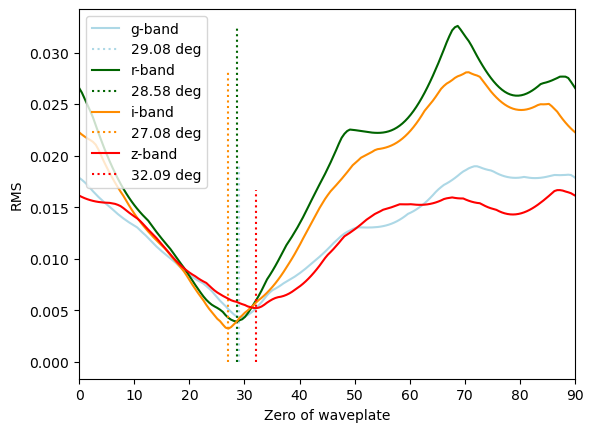

In [11]:
mask = zeros < 90 # mask values to avoid double minima when full range is 360 deg

min_zeros = np.array([])
for ch in range(1,5) :        
    imin[ch-1] = np.argmin(rms[ch-1][mask])
    
    min_zero = zeros[mask][imin[ch-1]]
    min_zeros = np.append(min_zeros,min_zero)
    
    plt.plot(zeros,rms[ch-1],color=colors[ch-1],label="{}-band".format(bands[ch-1]))
    plt.vlines(min_zero, 0, np.max(rms[ch-1]), ls=":", color=colors[ch-1], label="{:.2f} deg".format(min_zero))
    
plt.xlim(0,90)
#plt.ylim(0,0.04)
plt.xlabel("Zero of waveplate")
plt.ylabel("RMS")
plt.legend()
plt.show()     

### Calculate mean value and uncertainty  :

In [12]:
final_zero = ufloat(np.mean(min_zeros), np.std(min_zeros))
print("{} deg".format(final_zero))

29.2+/-1.8 deg
